 # 📊 Predicción del Rendimiento Académico en Instituciones Educativas de Loja mediante Modelos de Regresión Lineal Múltiple
 
 **Autores:** Miguel Alvarez y Jorge Ayala
 
 ---
 
 ## 🗂️ Descripción del Proyecto
 
 Este proyecto tiene como objetivo analizar y predecir el rendimiento académico de los estudiantes de la ciudad de Loja, utilizando técnicas avanzadas de regresión lineal múltiple. Para ello, se emplean los registros de matrícula del Ministerio de Educación (Mineduc), tanto de inicio como de fin de año lectivo, abarcando el periodo 2009-2024.
 
 A través de un proceso riguroso de Análisis Exploratorio de Datos (EDA) y limpieza de datos, buscamos descubrir patrones, tendencias y factores clave que inciden en el desempeño estudiantil. Finalmente, se desarrollarán y evaluarán modelos de regresión que permitan anticipar el rendimiento académico, aportando así herramientas valiosas para la toma de decisiones en el ámbito educativo.
 
 ---
 
 > ¡Acompáñanos en este viaje de ciencia de datos para transformar la educación en Loja!

In [2]:
# Librerias e importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


### Carga y Descripción de Datos


In [3]:
# Cargar los datasets
mineduc_data_inicio = pd.read_csv('data/mineduc_data_inicio.csv', sep=';')
mineduc_data_fin = pd.read_csv('data/mineduc_data_fin.csv', sep=';')

print("=== DATASET DE INICIO DE AÑO ===")
print(f"Dimensiones: {mineduc_data_inicio.shape}")
print("\nPrimeras 5 filas:")
display(mineduc_data_inicio.head())

print("\n=== DATASET DE FIN DE AÑO ===")
print(f"Dimensiones: {mineduc_data_fin.shape}")
print("\nPrimeras 5 filas:")
display(mineduc_data_fin.head())

/tmp/ipykernel_15360/790483509.py:2: DtypeWarning: Columns (0,1,2,4,6,8,9,10,11,12,13,14,21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  mineduc_data_inicio = pd.read_csv('data/mineduc_data_inicio.csv', sep=';')


=== DATASET DE INICIO DE AÑO ===
Dimensiones: (442716, 27)

Primeras 5 filas:


,Anio_lectivo,Zona,Provincia,Cod_Provincia,Canton,Cod_Canton,Parroquia,Cod_Parroquia,Nombre_Institucion,AMIE,...,Total_Docentes,Estudiantes_Femenino,Estudiantes_Masculino,Total_Estudiantes,Ecuatoriana,Colombiana,Venezolana,Peruana,Otros_Paises_de_America,Otros_Continentes
0,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,EL SAGRARIO,10104.0,UNIDAD EDUCATIVA PARTICULAR ROSA DE JESUS CORDERO,01B00002,...,96.0,1473.0,0.0,1473.0,1455,0,0,0,18,0
1,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,MONAY,10109.0,CEBCI,01B00010,...,25.0,148.0,179.0,327.0,311,3,0,0,9,4
2,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,BAÑOS,10151.0,CENTRO EDUCATIVO ROUSSEAU,01B00019,...,10.0,17.0,23.0,40.0,39,0,0,0,1,0
3,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,BAÑOS,10151.0,COLEGIO INTERCULTURAL BILINGUE DE NARANCAY,01B00020,...,17.0,132.0,132.0,264.0,264,0,0,0,0,0
4,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,CHAUCHA,10153.0,SEIS DE JUNIO,01B00021,...,1.0,18.0,6.0,24.0,24,0,0,0,0,0



=== DATASET DE FIN DE AÑO ===
Dimensiones: (286111, 23)

Primeras 5 filas:


,Anio_lectivo,Zona,Provincia,Cod_Provincia,Canton,Cod_Canton,Parroquia,Cod_Parroquia,Nombre_Institucion,AMIE,...,area,Regimen_Escolar,Jurisdiccion,Modalidad,Jornada,Acceso_Edificio,Total_Estudiantes,Promovidos,No promovidos,Abandono
0,2009-2010 Fin,Zona 6,AZUAY,1,CUENCA,101,BAÑOS,10151,CENTRO EDUCATIVO ROUSSEAU,01B00019,...,Rural,Sierra,Intercultural Bilingüe,Presencial,Matutina,Terrestre,47.0,47.0,0.0,0.0
1,2009-2010 Fin,Zona 6,AZUAY,1,CUENCA,101,BAÑOS,10151,COLEGIO INTERCULTURAL BILINGUE DE NARANCAY,01B00020,...,Rural,Sierra,Intercultural Bilingüe,Presencial y Semipresencial,Matutina,Terrestre,264.0,219.0,30.0,15.0
2,2009-2010 Fin,Zona 6,AZUAY,1,CUENCA,101,CHAUCHA,10153,SEIS DE JUNIO,01B00021,...,Rural,Costa,Intercultural Bilingüe,Presencial,Matutina,Terrestre,24.0,17.0,5.0,2.0
3,2009-2010 Fin,Zona 6,AZUAY,1,CUENCA,101,GIL RAMIREZ DAVALOS,10106,UNIDAD EDUCATIVA INTERCULTURAL BILINGUE LA PAZ...,01B00022,...,Urbana,Sierra,Intercultural Bilingüe,Semipresencial,Matutina,Terrestre,273.0,256.0,2.0,15.0
4,2009-2010 Fin,Zona 6,AZUAY,1,CUENCA,101,QUINGEO,10161,ESCUELA MONSEÑOR LEONIDAS PROAÑO II,01B00027,...,Rural,Sierra,Intercultural Bilingüe,Presencial,Matutina,Terrestre,130.0,109.0,9.0,12.0


### 📋 Información General de los Datasets

In [4]:
# Información detallada de los datasets
print("=== INFORMACIÓN DETALLADA DATASET DE INICIO ===")
print("Columnas:", list(mineduc_data_inicio.columns))
print("\nTipos de datos:")
print(mineduc_data_inicio.dtypes)
print("\nInformación general:")
mineduc_data_inicio.info()

print("\n" + "="*60)
print("=== INFORMACIÓN DETALLADA DATASET DE FIN ===")
print("Columnas:", list(mineduc_data_fin.columns))
print("\nTipos de datos:")
print(mineduc_data_fin.dtypes)
print("\nInformación general:")
mineduc_data_fin.info()


=== INFORMACIÓN DETALLADA DATASET DE INICIO ===
Columnas: ['Anio_lectivo', 'Zona', 'Provincia', 'Cod_Provincia', 'Canton', 'Cod_Canton', 'Parroquia', 'Cod_Parroquia', 'Nombre_Institucion', 'AMIE', 'Tipo_Educacion', 'Sostenimiento', 'Area', 'Regimen_Escolar', 'Jurisdiccion', 'Docentes_Femenino', 'Docentes_Masculino', 'Total_Docentes', 'Estudiantes_Femenino', 'Estudiantes_Masculino', 'Total_Estudiantes', 'Ecuatoriana', 'Colombiana', 'Venezolana', 'Peruana', 'Otros_Paises_de_America', 'Otros_Continentes']

Tipos de datos:
Anio_lectivo                object
Zona                        object
Provincia                   object
Cod_Provincia              float64
Canton                      object
Cod_Canton                 float64
Parroquia                   object
Cod_Parroquia              float64
Nombre_Institucion          object
AMIE                        object
Tipo_Educacion              object
Sostenimiento               object
Area                        object
Regimen_Escolar     

### 🧹 Análisis de Calidad de Datos

In [5]:
# Análisis de valores nulos y calidad de datos
def analizar_calidad_datos(df, nombre_dataset):
    print(f"=== ANÁLISIS DE CALIDAD - {nombre_dataset.upper()} ===")
    
    # Valores nulos
    valores_nulos = df.isnull().sum()
    porcentaje_nulos = (valores_nulos / len(df)) * 100
    
    print("\n📊 Valores nulos por columna:")
    calidad_datos = pd.DataFrame({
        'Valores_Nulos': valores_nulos,
        'Porcentaje_Nulos': porcentaje_nulos.round(2)
    })
    print(calidad_datos[calidad_datos['Valores_Nulos'] > 0])
    
    # Duplicados
    duplicados = df.duplicated().sum()
    print(f"\n🔄 Filas duplicadas: {duplicados}")
    print(f"📈 Porcentaje de duplicados: {(duplicados/len(df)*100):.2f}%")
    
    # Valores únicos por columna
    print(f"\n🔢 Valores únicos por columna:")
    for col in df.columns:
        print(f"  {col}: {df[col].nunique()} valores únicos")
    
    return calidad_datos

# Análisis para ambos datasets
calidad_inicio = analizar_calidad_datos(mineduc_data_inicio, "Dataset de Inicio")
print("\n" + "="*70)
calidad_fin = analizar_calidad_datos(mineduc_data_fin, "Dataset de Fin")


=== ANÁLISIS DE CALIDAD - DATASET DE INICIO ===

📊 Valores nulos por columna:
                         Valores_Nulos  Porcentaje_Nulos
Anio_lectivo                    120114             27.13
Zona                            120114             27.13
Provincia                       120114             27.13
Cod_Provincia                   120114             27.13
Canton                          120114             27.13
Cod_Canton                      120114             27.13
Parroquia                       120114             27.13
Cod_Parroquia                   120114             27.13
Nombre_Institucion              120114             27.13
AMIE                            120114             27.13
Tipo_Educacion                  120114             27.13
Sostenimiento                   120114             27.13
Area                            120114             27.13
Regimen_Escolar                 120114             27.13
Jurisdiccion                    120114             27.13
Docentes_F

### 📈 Estadísticas Descriptivas


In [6]:
# Estadísticas descriptivas detalladas
print("=== ESTADÍSTICAS DESCRIPTIVAS - DATASET DE INICIO ===")
print(mineduc_data_inicio.describe(include='all'))

print("\n" + "="*70)
print("=== ESTADÍSTICAS DESCRIPTIVAS - DATASET DE FIN ===")
print(mineduc_data_fin.describe(include='all'))

# Análisis de variables numéricas específicas (si las hay)
print("\n=== ANÁLISIS DE VARIABLES NUMÉRICAS ===")
cols_numericas_inicio = mineduc_data_inicio.select_dtypes(include=[np.number]).columns
cols_numericas_fin = mineduc_data_fin.select_dtypes(include=[np.number]).columns

print(f"Variables numéricas en dataset de inicio: {list(cols_numericas_inicio)}")
print(f"Variables numéricas en dataset de fin: {list(cols_numericas_fin)}")

if len(cols_numericas_inicio) > 0:
    print("\nEstadísticas detalladas para variables numéricas (INICIO):")
    print(mineduc_data_inicio[cols_numericas_inicio].describe().round(2))

if len(cols_numericas_fin) > 0:
    print("\nEstadísticas detalladas para variables numéricas (FIN):")
    print(mineduc_data_fin[cols_numericas_fin].describe().round(2))


=== ESTADÍSTICAS DESCRIPTIVAS - DATASET DE INICIO ===
            Anio_lectivo    Zona Provincia  Cod_Provincia     Canton  \
count             322602  322602    322602  322602.000000     322602   
unique                16      11        26            NaN        228   
top     2009-2010 Inicio  Zona 4    GUAYAS            NaN  GUAYAQUIL   
freq               27651   53194     55256            NaN      28283   
mean                 NaN     NaN       NaN      11.672039        NaN   
std                  NaN     NaN       NaN       6.658145        NaN   
min                  NaN     NaN       NaN       1.000000        NaN   
25%                  NaN     NaN       NaN       8.000000        NaN   
50%                  NaN     NaN       NaN      11.000000        NaN   
75%                  NaN     NaN       NaN      15.000000        NaN   
max                  NaN     NaN       NaN      90.000000        NaN   

           Cod_Canton Parroquia  Cod_Parroquia Nombre_Institucion      AMIE  \
co

In [15]:
# Antes de visualizar filtrar datos de Loja

mineduc_data_inicio_loja = mineduc_data_inicio[mineduc_data_inicio['Cod_Provincia'] == 11.0]
mineduc_data_fin_loja = mineduc_data_fin[mineduc_data_fin['Cod_Provincia'] == 11.0]

print(mineduc_data_inicio_loja.head())
print(mineduc_data_fin_loja.head())




           Anio_lectivo    Zona Provincia  Cod_Provincia Canton  Cod_Canton  \
12694  2009-2010 Inicio  Zona 7      LOJA           11.0   LOJA      1101.0   
12695  2009-2010 Inicio  Zona 7      LOJA           11.0   LOJA      1101.0   
12696  2009-2010 Inicio  Zona 7      LOJA           11.0   LOJA      1101.0   
12697  2009-2010 Inicio  Zona 7      LOJA           11.0   LOJA      1101.0   
12698  2009-2010 Inicio  Zona 7      LOJA           11.0   LOJA      1101.0   

       Parroquia  Cod_Parroquia             Nombre_Institucion      AMIE  ...  \
12694  SAN LUCAS       110157.0  UNIDAD EDUCATIVA MUSHUK RIMAK  11B00010  ...   
12695  SAN LUCAS       110157.0             LUZ COSTA ZABALETA  11B00011  ...   
12696  SAN LUCAS       110157.0      MARIANA DE JESUS GUANUCHE  11B00012  ...   
12697  SAN LUCAS       110157.0                ROBERTO ANDRADE  11B00013  ...   
12698  SAN LUCAS       110157.0                       INKA ÑAN  11B00014  ...   

      Total_Docentes Estudiantes_Femen

### 📊 Visualizaciones Exploratorias


🎨 VISUALIZACIONES PARA DATASET DE INICIO LOJA


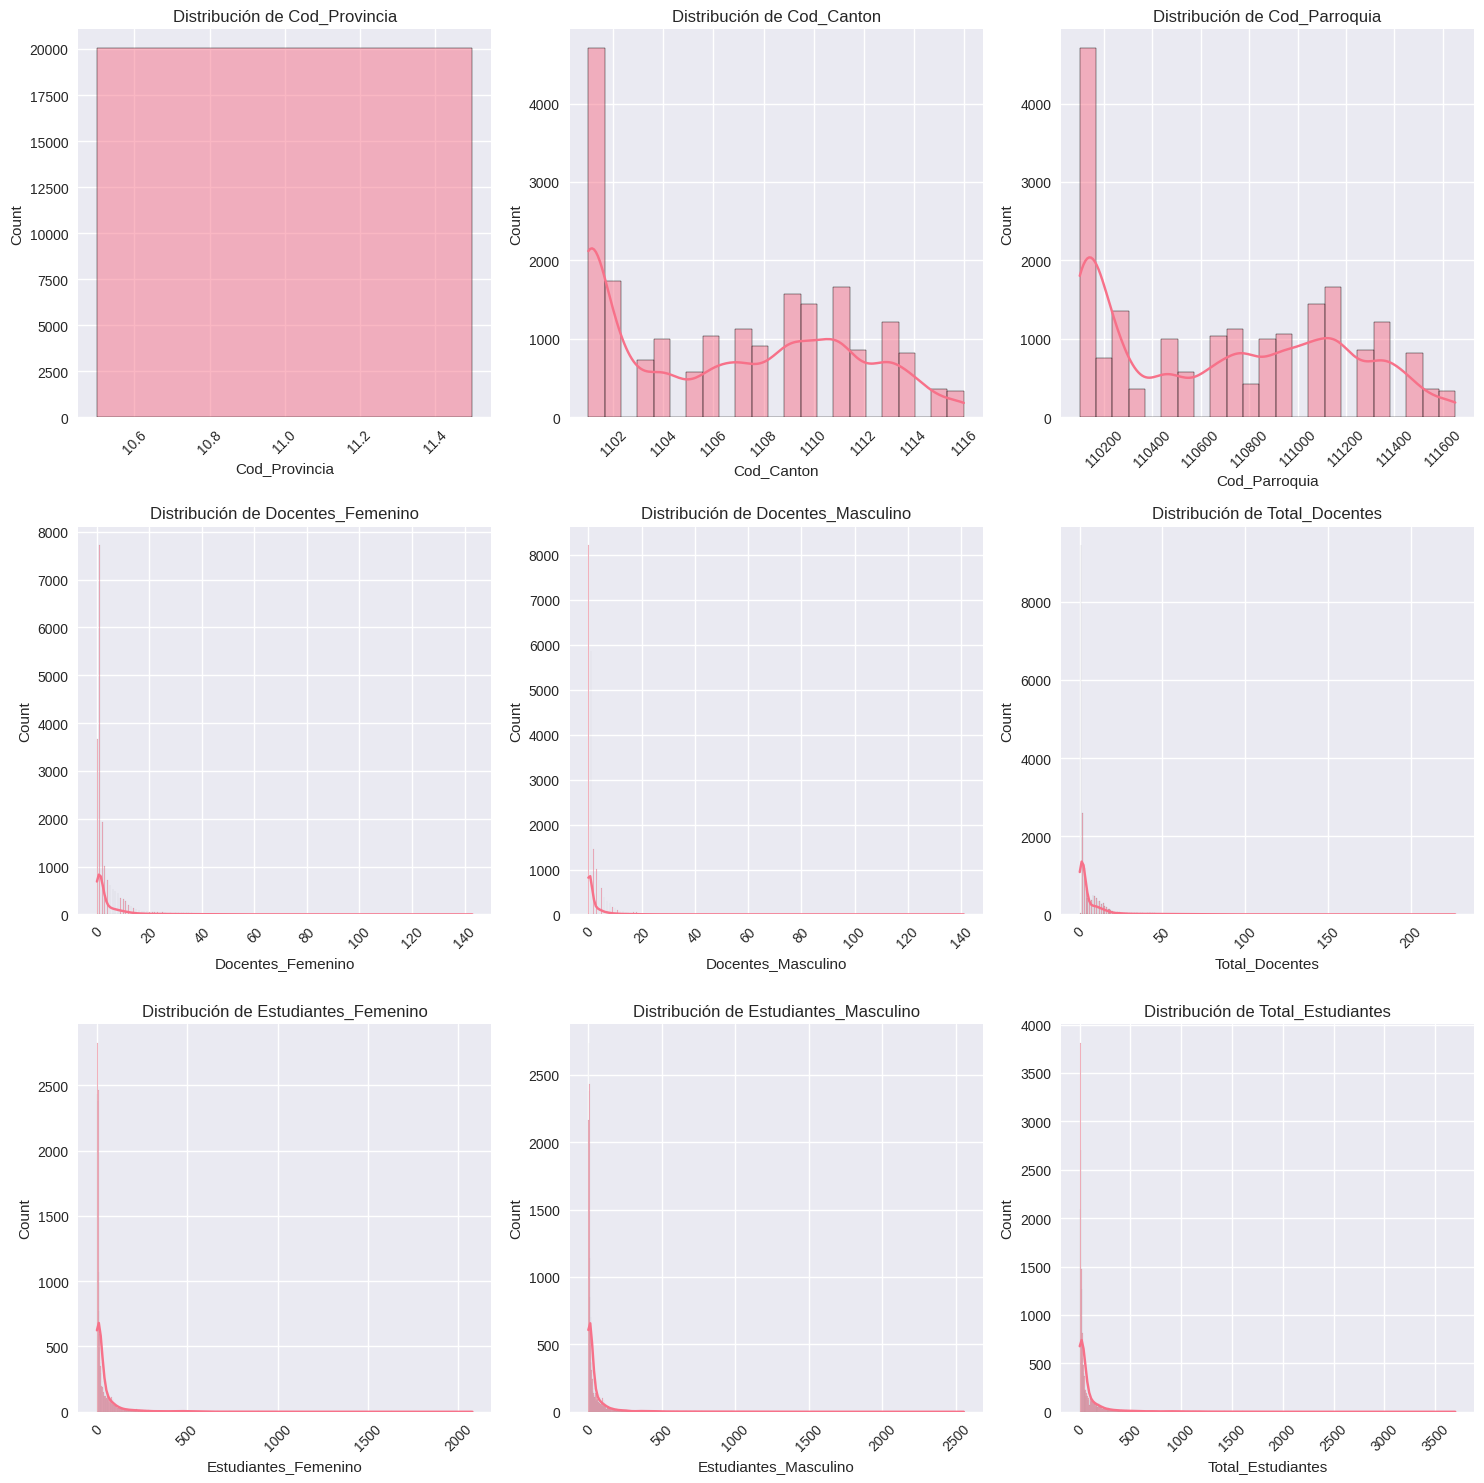

📋 Variable 'Anio_lectivo': 16 valores únicos (demasiados para visualizar)
📋 Variable 'Zona': 1 valores únicos (demasiados para visualizar)
📋 Variable 'Provincia': 1 valores únicos (demasiados para visualizar)
📋 Variable 'Canton': 16 valores únicos (demasiados para visualizar)
📋 Variable 'Parroquia': 122 valores únicos (demasiados para visualizar)
📋 Variable 'Nombre_Institucion': 3417 valores únicos (demasiados para visualizar)
📋 Variable 'AMIE': 1595 valores únicos (demasiados para visualizar)


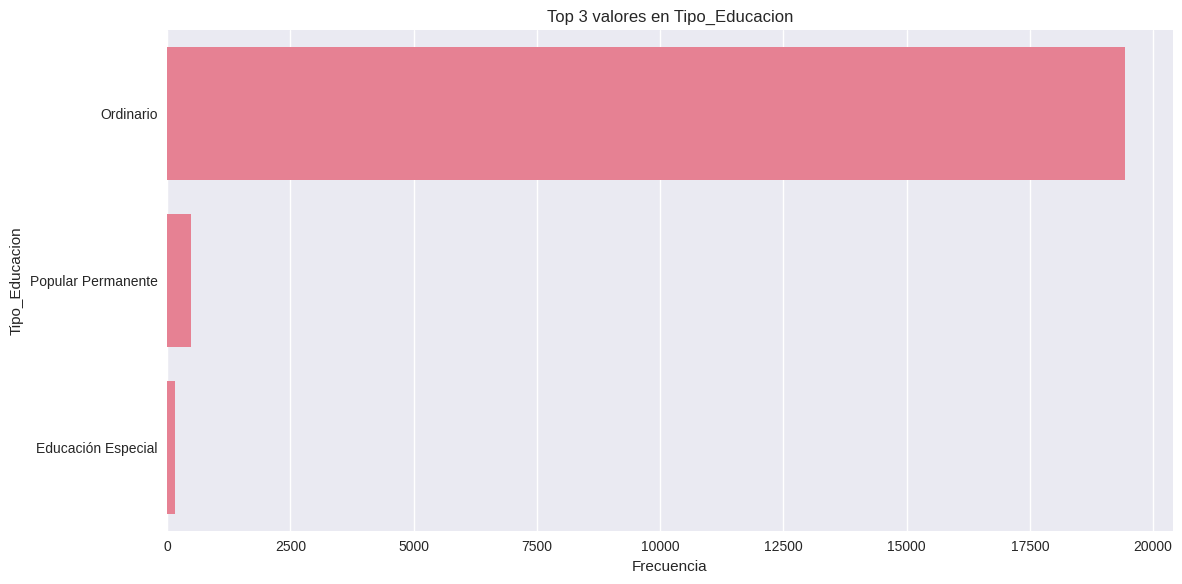

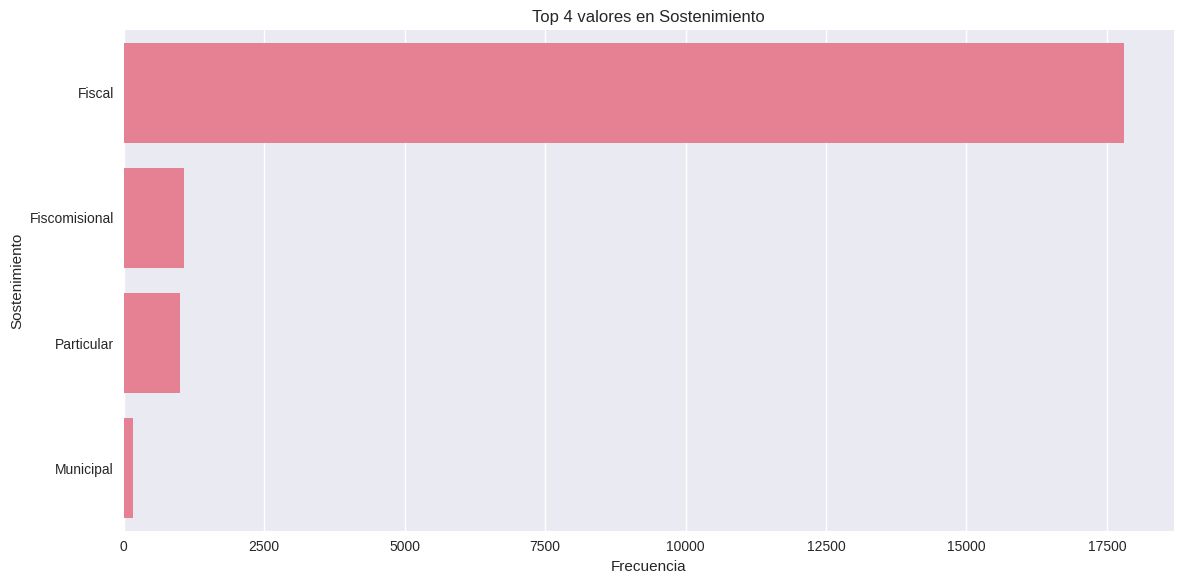

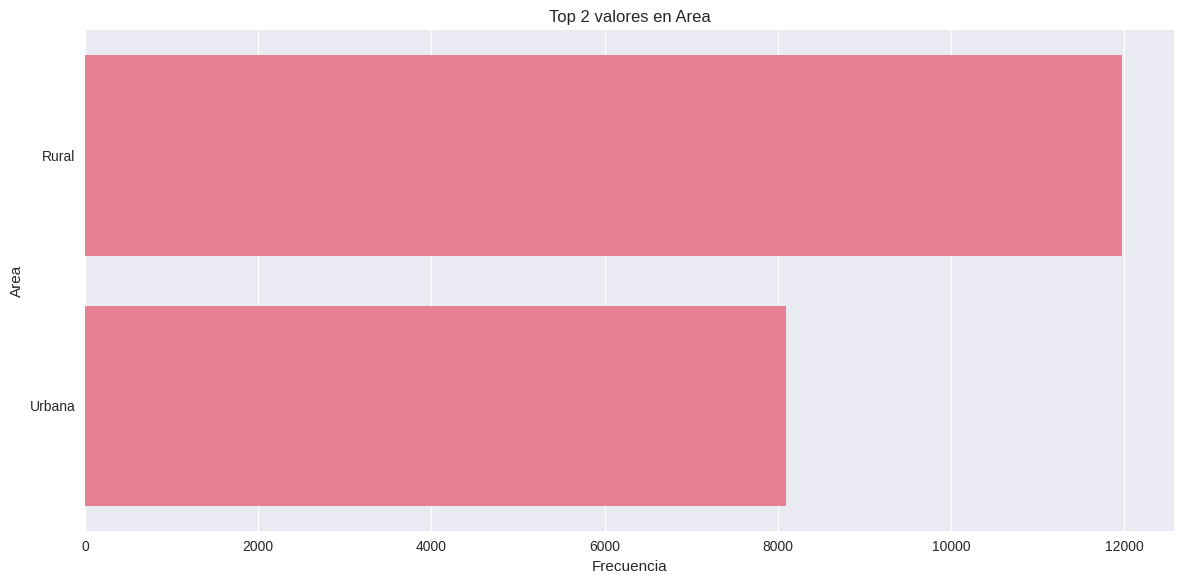

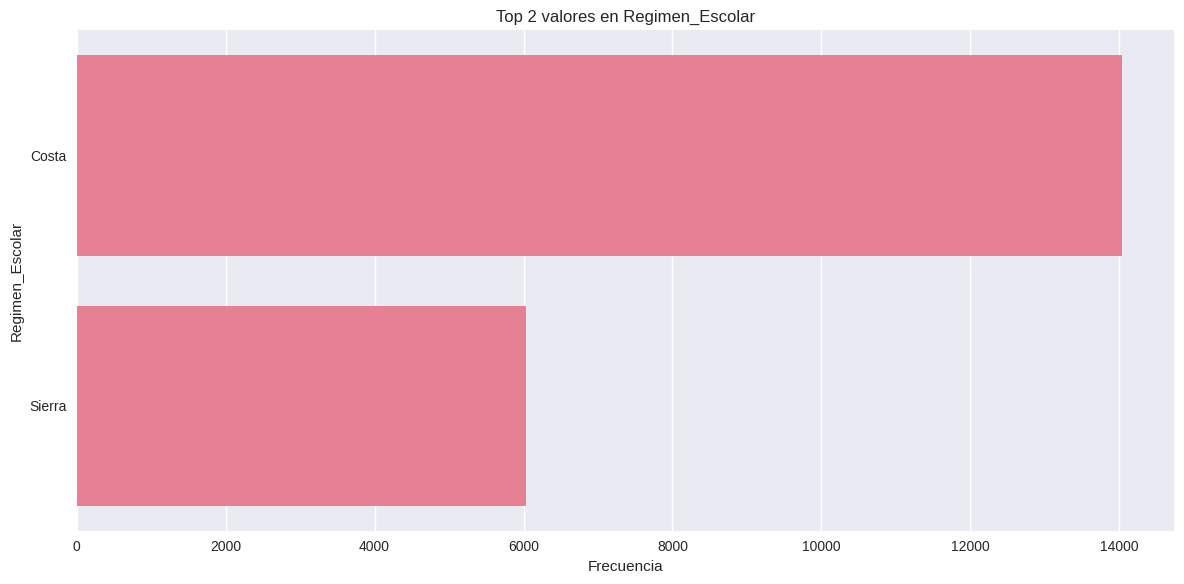

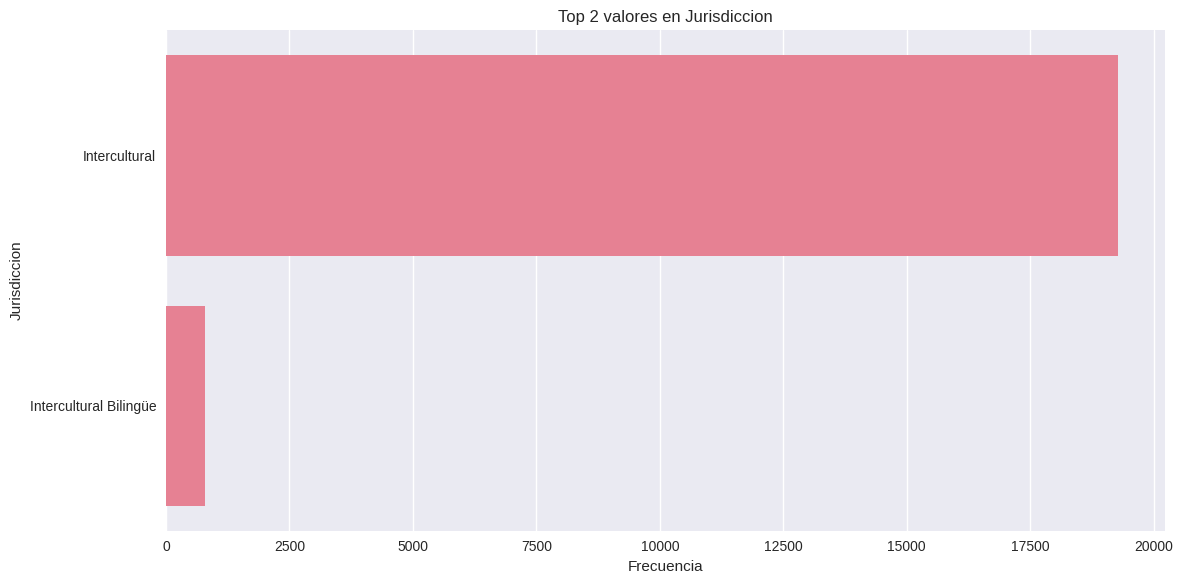

📋 Variable 'Ecuatoriana': 1643 valores únicos (demasiados para visualizar)
📋 Variable 'Colombiana': 22 valores únicos (demasiados para visualizar)
📋 Variable 'Venezolana': 59 valores únicos (demasiados para visualizar)
📋 Variable 'Peruana': 38 valores únicos (demasiados para visualizar)
📋 Variable 'Otros_Paises_de_America': 39 valores únicos (demasiados para visualizar)
📋 Variable 'Otros_Continentes': 77 valores únicos (demasiados para visualizar)

🎨 VISUALIZACIONES PARA DATASET DE FIN LOJA


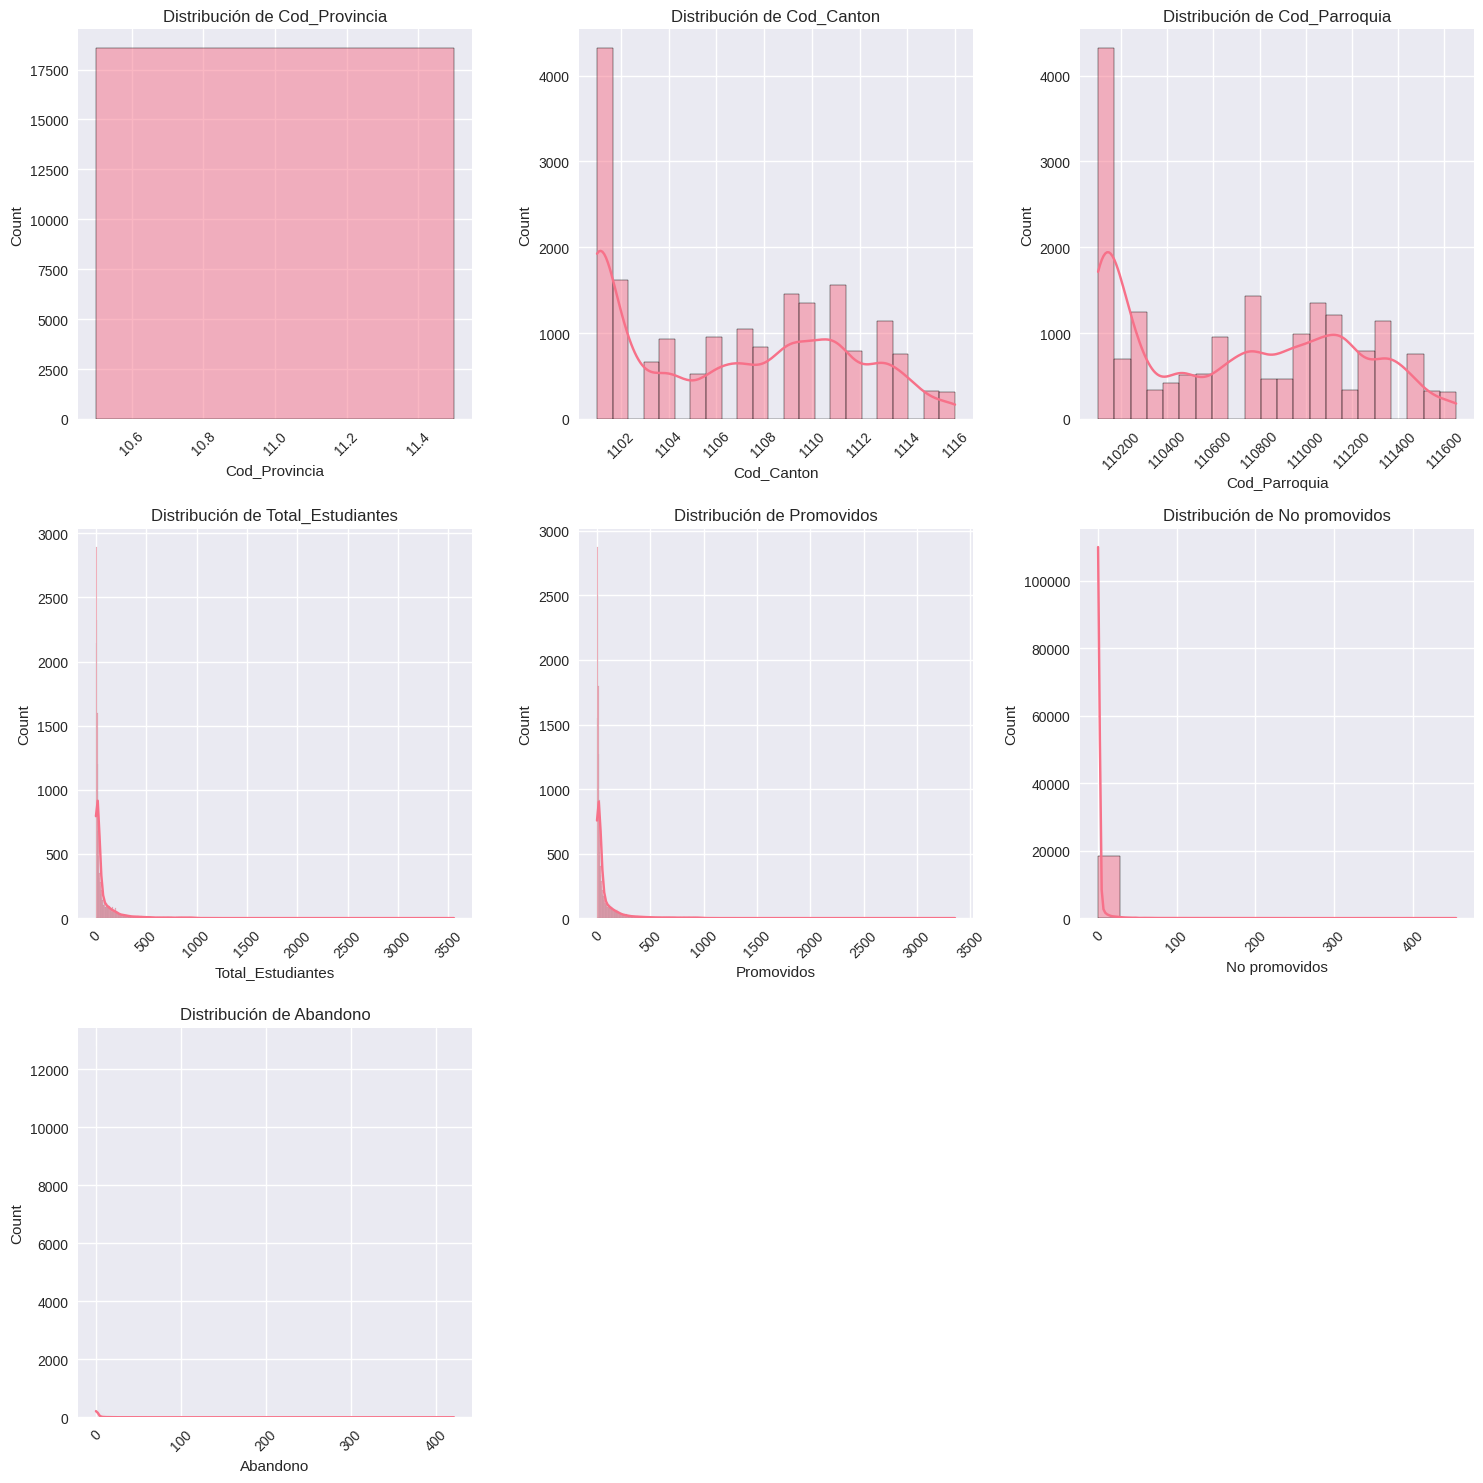

<Figure size 1200x600 with 0 Axes>

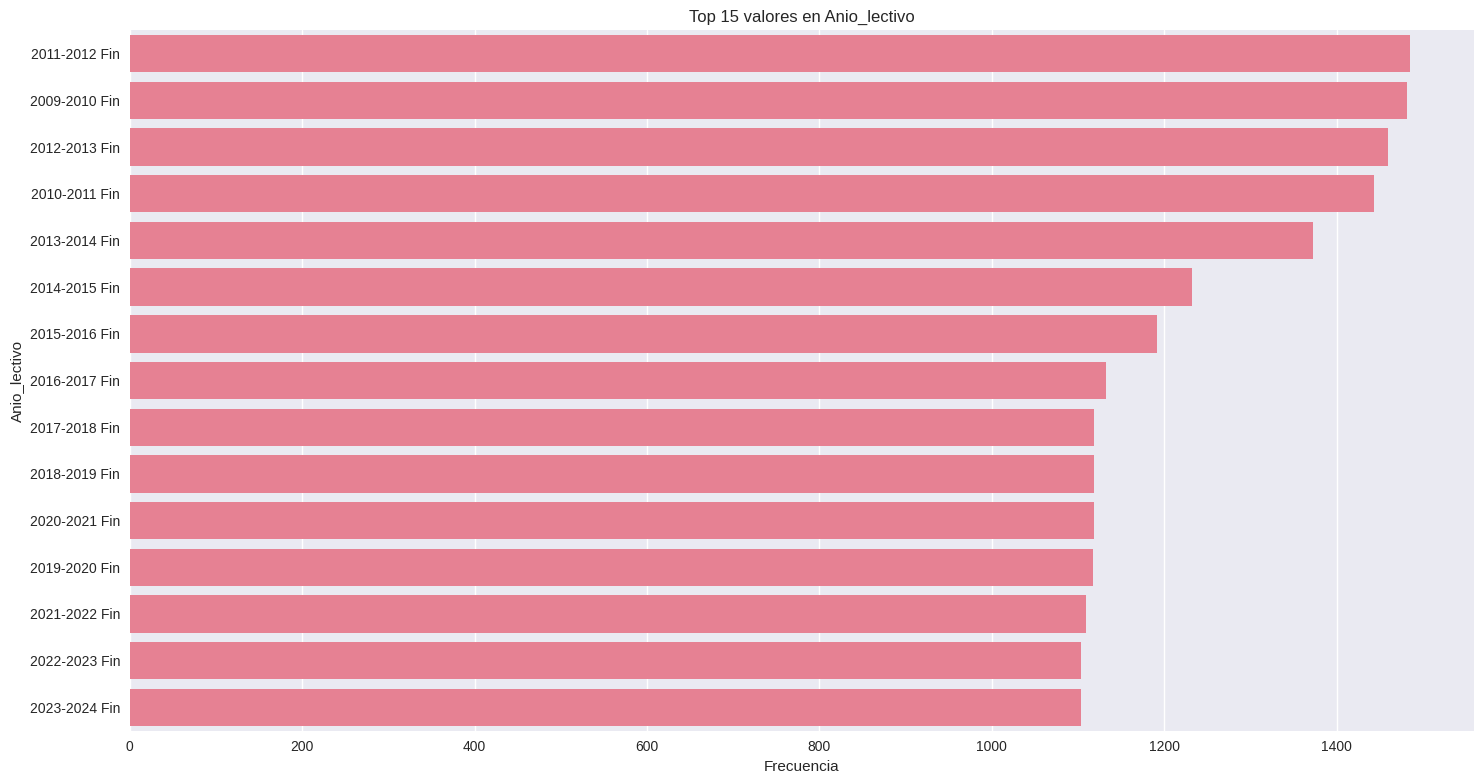

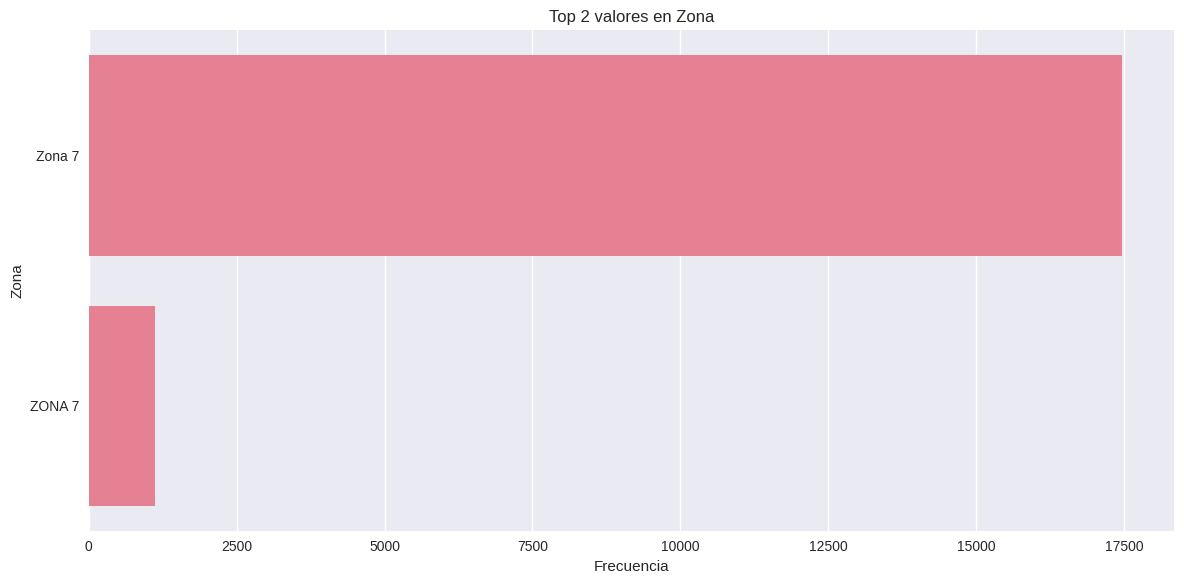

📋 Variable 'Provincia': 1 valores únicos (demasiados para visualizar)
📋 Variable 'Canton': 16 valores únicos (demasiados para visualizar)
📋 Variable 'Parroquia': 108 valores únicos (demasiados para visualizar)
📋 Variable 'Nombre_Institucion': 3347 valores únicos (demasiados para visualizar)
📋 Variable 'AMIE': 1576 valores únicos (demasiados para visualizar)
📋 Variable 'Escolarizacion': 1 valores únicos (demasiados para visualizar)


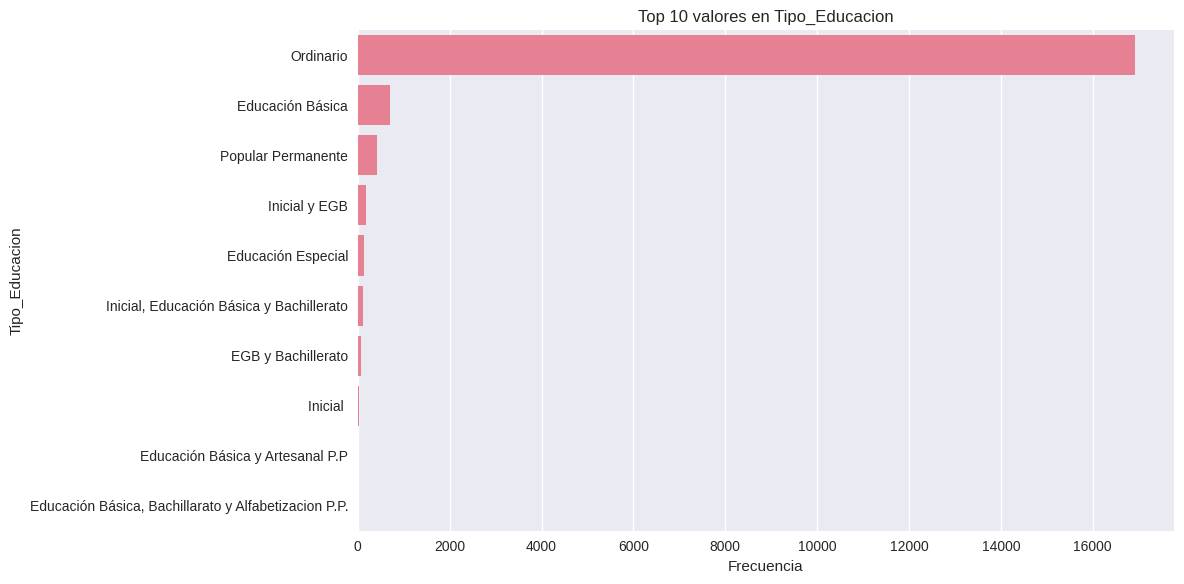

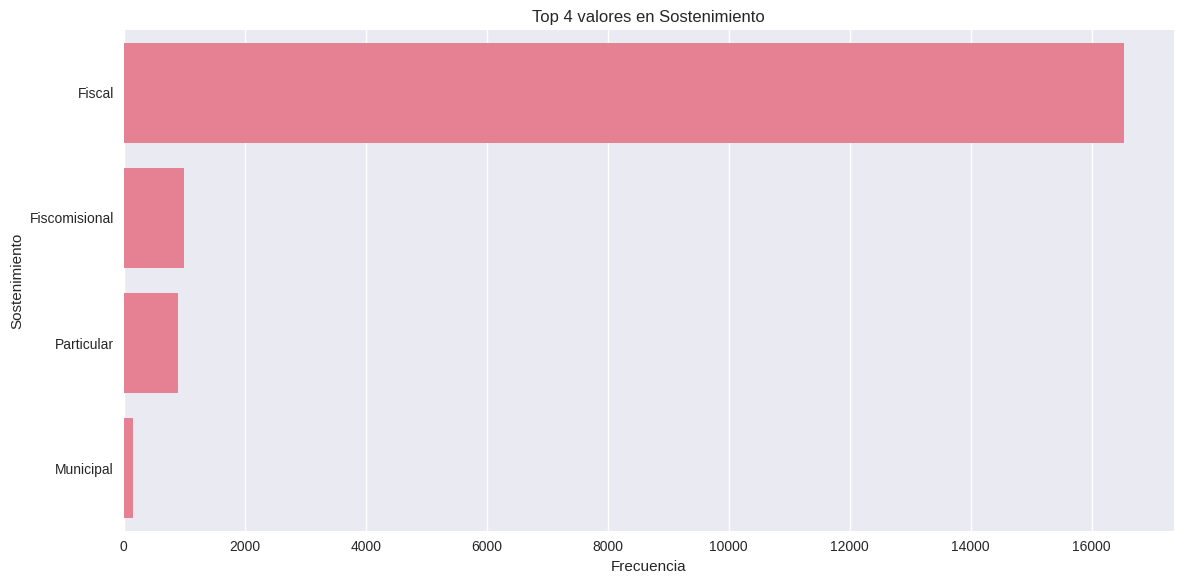

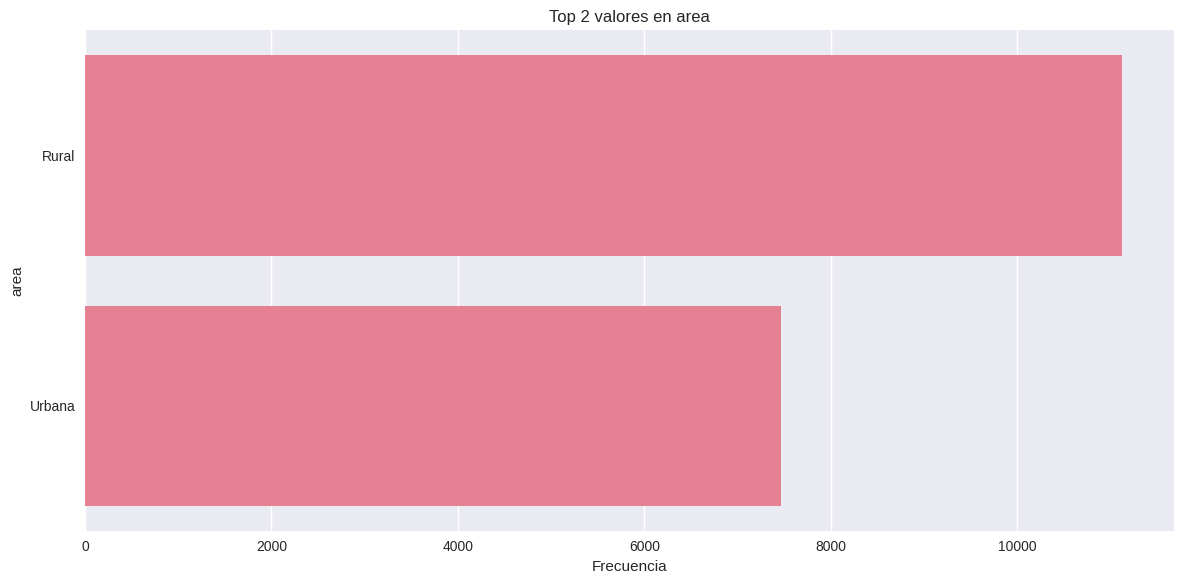

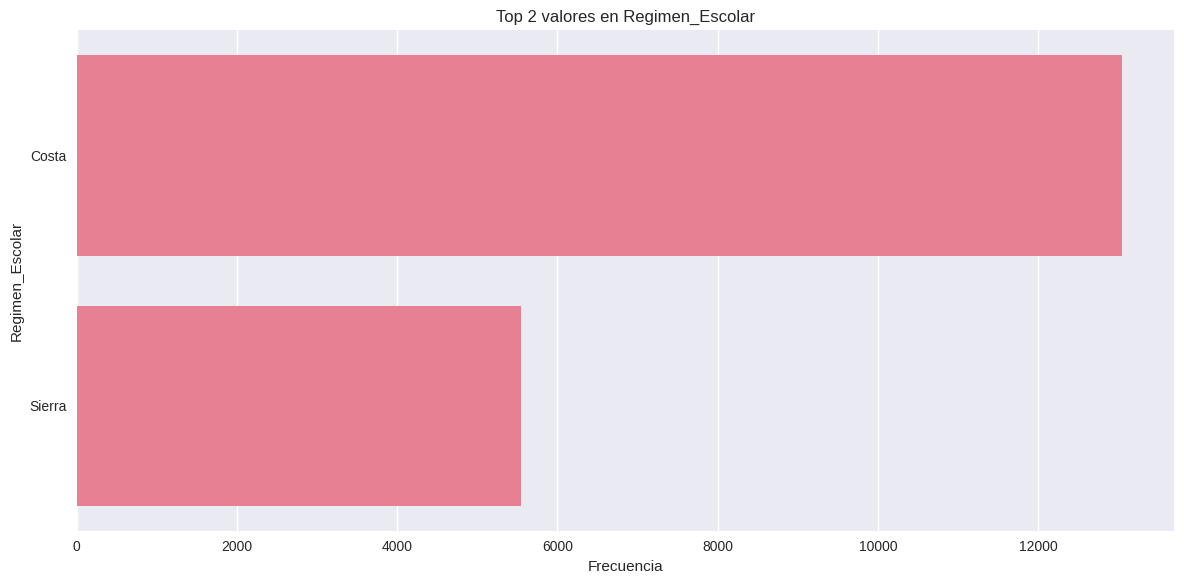

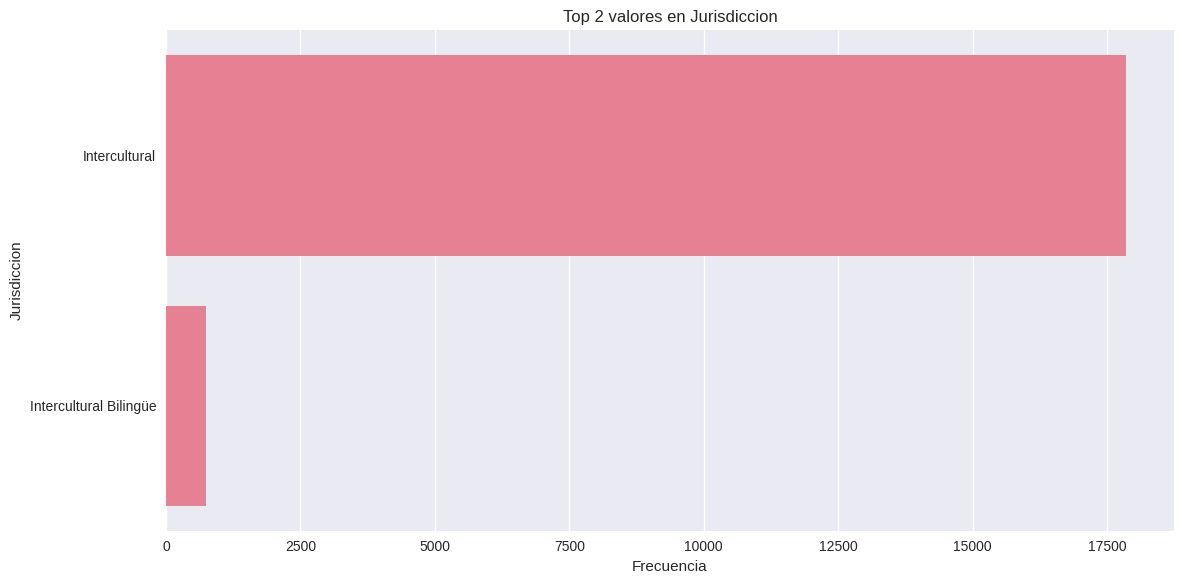

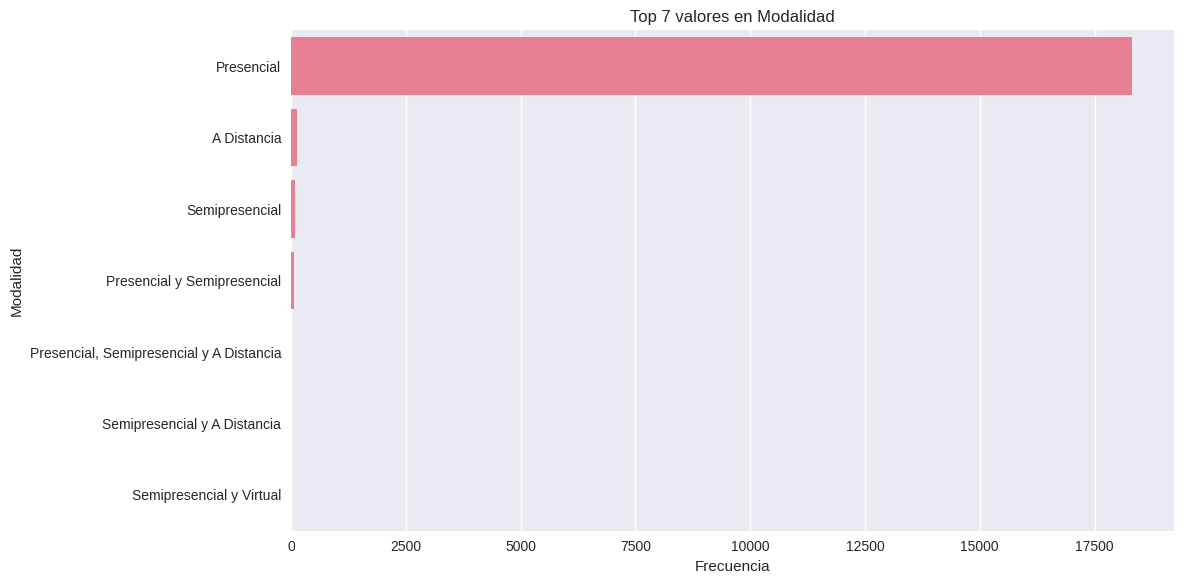

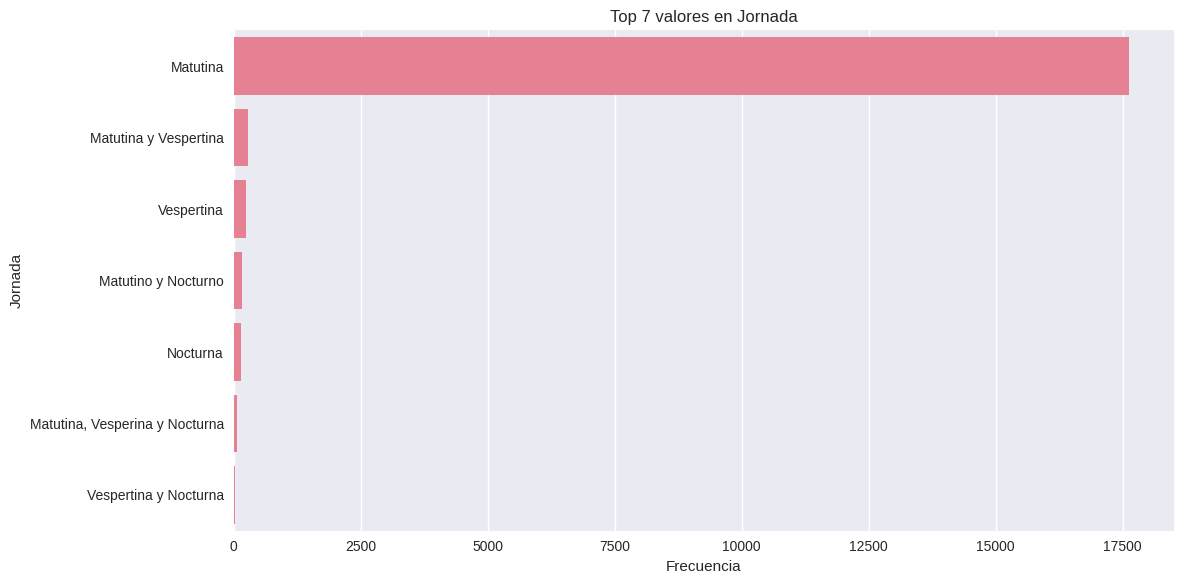

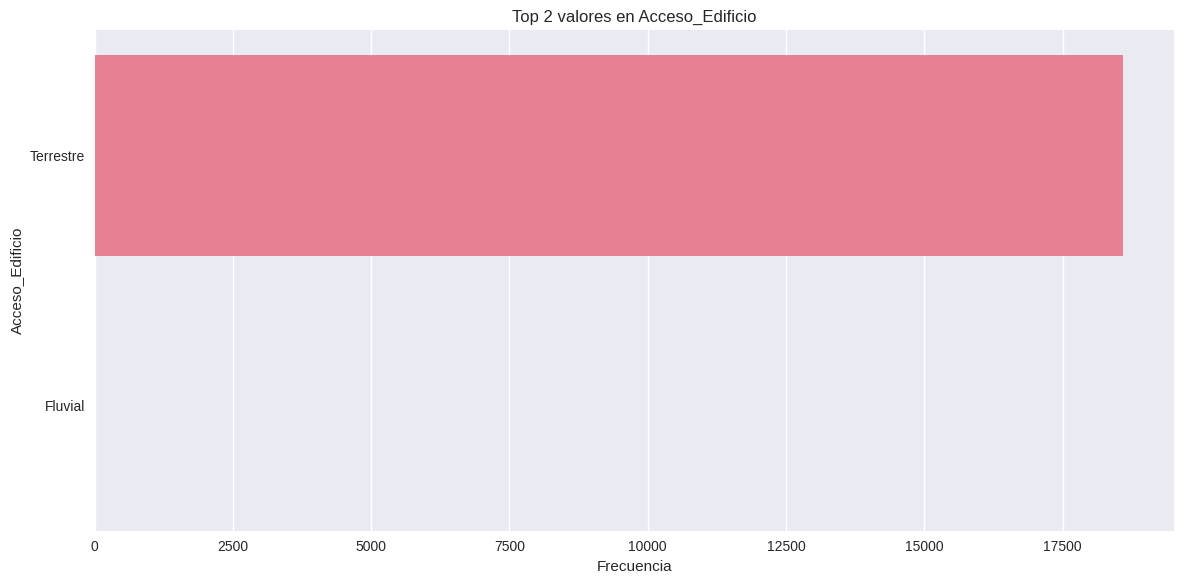

In [16]:
# Configuración de estilo para visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Función para crear visualizaciones automáticas
def crear_visualizaciones_exploratorias(df, nombre_dataset, max_categorias=15):
    """
    Crea visualizaciones automáticas para explorar el dataset
    """
    print(f"🎨 VISUALIZACIONES PARA {nombre_dataset.upper()}")
    
    # Identificar tipos de columnas
    cols_numericas = df.select_dtypes(include=[np.number]).columns
    cols_categoricas = df.select_dtypes(include=['object']).columns
    
    # 1. Distribuciones de variables numéricas
    if len(cols_numericas) > 0:
        n_plots = len(cols_numericas)
        n_cols = min(3, n_plots)
        n_rows = (n_plots + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        if n_plots == 1:
            axes = [axes]
        elif n_rows == 1:
            axes = axes
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(cols_numericas):
            if i < len(axes):
                sns.histplot(data=df, x=col, kde=True, ax=axes[i])
                axes[i].set_title(f'Distribución de {col}')
                axes[i].tick_params(axis='x', rotation=45)
        
        # Ocultar axes vacíos
        for i in range(len(cols_numericas), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    # 2. Top valores para variables categóricas
    if len(cols_categoricas) > 0:
        for col in cols_categoricas:
            valores_unicos = df[col].nunique()
            if valores_unicos <= max_categorias and valores_unicos > 1:
                plt.figure(figsize=(12, 6))
                
                # Contar valores y tomar los top
                value_counts = df[col].value_counts().head(20)
                
                if len(value_counts) > 10:
                    plt.figure(figsize=(15, 8))
                
                sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
                plt.title(f'Top {min(20, len(value_counts))} valores en {col}')
                plt.xlabel('Frecuencia')
                plt.tight_layout()
                plt.show()
            else:
                print(f"📋 Variable '{col}': {valores_unicos} valores únicos (demasiados para visualizar)")

# Crear visualizaciones para ambos datasets
crear_visualizaciones_exploratorias(mineduc_data_inicio_loja, "Dataset de Inicio Loja")
print("\n" + "="*80)
crear_visualizaciones_exploratorias(mineduc_data_fin_loja, "Dataset de Fin Loja")


### 🔄 Comparación entre Datasets de Inicio y Fin


In [7]:
# Comparación estructural entre datasets
print("🔍 COMPARACIÓN ESTRUCTURAL ENTRE DATASETS")
print("="*60)

# Comparar columnas
print("📊 COMPARACIÓN DE COLUMNAS:")
cols_inicio = set(mineduc_data_inicio.columns)
cols_fin = set(mineduc_data_fin.columns)

print(f"Columnas en común: {len(cols_inicio.intersection(cols_fin))}")
print(f"Columnas solo en INICIO: {cols_inicio - cols_fin}")
print(f"Columnas solo en FIN: {cols_fin - cols_inicio}")

# Comparar dimensiones
print("\n📏 COMPARACIÓN DE DIMENSIONES:")
print(f"Dataset INICIO: {mineduc_data_inicio.shape[0]:,} filas x {mineduc_data_inicio.shape[1]} columnas")
print(f"Dataset FIN: {mineduc_data_fin.shape[0]:,} filas x {mineduc_data_fin.shape[1]} columnas")
print(f"Diferencia en filas: {mineduc_data_inicio.shape[0] - mineduc_data_fin.shape[0]:,}")

# Si tienen columnas comunes, comparar estadísticas básicas
columnas_comunes = list(cols_inicio.intersection(cols_fin))
if columnas_comunes:
    print(f"\n📈 ANÁLISIS DE COLUMNAS COMUNES ({len(columnas_comunes)} columnas):")
    print("Columnas comunes:", columnas_comunes)
    
    # Comparar estadísticas para columnas numéricas comunes
    cols_num_comunes = []
    for col in columnas_comunes:
        if (mineduc_data_inicio[col].dtype in ['int64', 'float64'] and 
            mineduc_data_fin[col].dtype in ['int64', 'float64']):
            cols_num_comunes.append(col)
    
    if cols_num_comunes:
        print(f"\nColumnas numéricas comunes: {cols_num_comunes}")
        
        # Crear DataFrame comparativo
        comparacion = pd.DataFrame({
            'Variable': cols_num_comunes,
            'Media_Inicio': [mineduc_data_inicio[col].mean() for col in cols_num_comunes],
            'Media_Fin': [mineduc_data_fin[col].mean() for col in cols_num_comunes],
            'Std_Inicio': [mineduc_data_inicio[col].std() for col in cols_num_comunes],
            'Std_Fin': [mineduc_data_fin[col].std() for col in cols_num_comunes]
        })
        
        comparacion['Diferencia_Media'] = comparacion['Media_Fin'] - comparacion['Media_Inicio']
        comparacion['Diferencia_Porcentual'] = (comparacion['Diferencia_Media'] / comparacion['Media_Inicio'] * 100).round(2)
        
        print("\nComparación estadística:")
        print(comparacion.round(3))


🔍 COMPARACIÓN ESTRUCTURAL ENTRE DATASETS
📊 COMPARACIÓN DE COLUMNAS:
Columnas en común: 15
Columnas solo en INICIO: {'Colombiana', 'Venezolana', 'Otros_Paises_de_America', 'Otros_Continentes', 'Total_Docentes', 'Docentes_Masculino', 'Ecuatoriana', 'Area', 'Estudiantes_Masculino', 'Docentes_Femenino', 'Estudiantes_Femenino', 'Peruana'}
Columnas solo en FIN: {'Abandono', 'Promovidos', 'Modalidad', 'Jornada', 'Acceso_Edificio', 'area', 'Escolarizacion', 'No promovidos'}

📏 COMPARACIÓN DE DIMENSIONES:
Dataset INICIO: 442,716 filas x 27 columnas
Dataset FIN: 286,111 filas x 23 columnas
Diferencia en filas: 156,605

📈 ANÁLISIS DE COLUMNAS COMUNES (15 columnas):
Columnas comunes: ['Cod_Parroquia', 'Parroquia', 'AMIE', 'Jurisdiccion', 'Cod_Canton', 'Total_Estudiantes', 'Nombre_Institucion', 'Sostenimiento', 'Tipo_Educacion', 'Canton', 'Anio_lectivo', 'Cod_Provincia', 'Provincia', 'Regimen_Escolar', 'Zona']

Columnas numéricas comunes: ['Cod_Parroquia', 'Cod_Canton', 'Total_Estudiantes', 'Cod_Pr

### 🎯 Identificación de Patrones y Variables Clave


In [8]:
# Análisis específico para identificar variables clave para predicción de rendimiento
print("🎯 IDENTIFICACIÓN DE VARIABLES CLAVE PARA PREDICCIÓN DE RENDIMIENTO")
print("="*80)

def analizar_patrones_rendimiento(df_inicio, df_fin):
    """
    Analiza patrones que podrían indicar rendimiento académico
    """
    
    # Buscar patrones en los nombres de columnas que sugieran métricas de rendimiento
    columnas_inicio = df_inicio.columns.tolist()
    columnas_fin = df_fin.columns.tolist()
    
    # Palabras clave que podrían indicar métricas de rendimiento
    keywords_rendimiento = ['matricula', 'promovido', 'reprobado', 'desercion', 'abandono', 
                           'aprobado', 'nota', 'calificacion', 'resultado', 'estudiante']
    
    print("🔍 ANÁLISIS DE COLUMNAS RELEVANTES PARA RENDIMIENTO:")
    
    print("\n📋 Columnas en dataset de INICIO que podrían indicar factores de rendimiento:")
    for col in columnas_inicio:
        for keyword in keywords_rendimiento:
            if keyword.lower() in col.lower():
                print(f"  ✓ {col}")
                break
    
    print("\n📋 Columnas en dataset de FIN que podrían indicar resultados de rendimiento:")
    for col in columnas_fin:
        for keyword in keywords_rendimiento:
            if keyword.lower() in col.lower():
                print(f"  ✓ {col}")
                break
    
    # Analizar la diferencia entre datasets como indicador de rendimiento
    print("\n📊 ANÁLISIS DE DIFERENCIAS COMO INDICADOR DE RENDIMIENTO:")
    print("La diferencia entre matrículas de inicio y fin puede indicar:")
    print("  • Deserción escolar (inicio > fin)")
    print("  • Traslados o migraciones estudiantiles")
    print("  • Eficiencia del sistema educativo")
    
    # Sugerir variables objetivo potenciales
    print("\n🎯 VARIABLES OBJETIVO POTENCIALES PARA MODELOS DE REGRESIÓN:")
    print("Basándose en la estructura de datos educativos, se sugiere crear/identificar:")
    print("  1. Tasa de retención = (Estudiantes_fin / Estudiantes_inicio) * 100")
    print("  2. Diferencia absoluta = Estudiantes_inicio - Estudiantes_fin")
    print("  3. Porcentaje de deserción = ((Estudiantes_inicio - Estudiantes_fin) / Estudiantes_inicio) * 100")
    
    return None

# Ejecutar análisis
analizar_patrones_rendimiento(mineduc_data_inicio, mineduc_data_fin)

# Mostrar una muestra de las primeras filas para entender mejor la estructura
print("\n" + "="*80)
print("📋 MUESTRA DE DATOS PARA IDENTIFICAR ESTRUCTURA:")
print("\nPrimeras 3 filas del dataset de INICIO:")
for i, (idx, row) in enumerate(mineduc_data_inicio.head(3).iterrows()):
    print(f"\nFila {i+1}:")
    for col, val in row.items():
        print(f"  {col}: {val}")

print("\n" + "-"*40)
print("Primeras 3 filas del dataset de FIN:")
for i, (idx, row) in enumerate(mineduc_data_fin.head(3).iterrows()):
    print(f"\nFila {i+1}:")
    for col, val in row.items():
        print(f"  {col}: {val}")


🎯 IDENTIFICACIÓN DE VARIABLES CLAVE PARA PREDICCIÓN DE RENDIMIENTO
🔍 ANÁLISIS DE COLUMNAS RELEVANTES PARA RENDIMIENTO:

📋 Columnas en dataset de INICIO que podrían indicar factores de rendimiento:
  ✓ Estudiantes_Femenino
  ✓ Estudiantes_Masculino
  ✓ Total_Estudiantes

📋 Columnas en dataset de FIN que podrían indicar resultados de rendimiento:
  ✓ Total_Estudiantes
  ✓ Promovidos
  ✓ No promovidos
  ✓ Abandono

📊 ANÁLISIS DE DIFERENCIAS COMO INDICADOR DE RENDIMIENTO:
La diferencia entre matrículas de inicio y fin puede indicar:
  • Deserción escolar (inicio > fin)
  • Traslados o migraciones estudiantiles
  • Eficiencia del sistema educativo

🎯 VARIABLES OBJETIVO POTENCIALES PARA MODELOS DE REGRESIÓN:
Basándose en la estructura de datos educativos, se sugiere crear/identificar:
  1. Tasa de retención = (Estudiantes_fin / Estudiantes_inicio) * 100
  2. Diferencia absoluta = Estudiantes_inicio - Estudiantes_fin
  3. Porcentaje de deserción = ((Estudiantes_inicio - Estudiantes_fin) / Est

### 📝 Resumen del Análisis Exploratorio y Próximos Pasos


In [9]:
# Resumen ejecutivo del análisis exploratorio
print("📋 RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO DE DATOS")
print("="*70)

def generar_resumen_eda(df_inicio, df_fin):
    """
    Genera un resumen ejecutivo del análisis exploratorio
    """
    
    print("🔍 HALLAZGOS PRINCIPALES:")
    print(f"  • Total de registros en INICIO: {df_inicio.shape[0]:,}")
    print(f"  • Total de registros en FIN: {df_fin.shape[0]:,}")
    print(f"  • Diferencia en registros: {df_inicio.shape[0] - df_fin.shape[0]:,}")
    print(f"  • Variables en INICIO: {df_inicio.shape[1]}")
    print(f"  • Variables en FIN: {df_fin.shape[1]}")
    
    # Calidad de datos
    nulos_inicio = df_inicio.isnull().sum().sum()
    nulos_fin = df_fin.isnull().sum().sum()
    print(f"  • Valores nulos en INICIO: {nulos_inicio:,}")
    print(f"  • Valores nulos en FIN: {nulos_fin:,}")
    
    # Duplicados
    dup_inicio = df_inicio.duplicated().sum()
    dup_fin = df_fin.duplicated().sum()
    print(f"  • Registros duplicados en INICIO: {dup_inicio:,}")
    print(f"  • Registros duplicados en FIN: {dup_fin:,}")

# Ejecutar resumen
generar_resumen_eda(mineduc_data_inicio, mineduc_data_fin)

📋 RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO DE DATOS
🔍 HALLAZGOS PRINCIPALES:
  • Total de registros en INICIO: 442,716
  • Total de registros en FIN: 286,111
  • Diferencia en registros: 156,605
  • Variables en INICIO: 27
  • Variables en FIN: 23
  • Valores nulos en INICIO: 3,243,078
  • Valores nulos en FIN: 0
  • Registros duplicados en INICIO: 120,113
  • Registros duplicados en FIN: 0


### 🧹 Limpieza de datos - Análisis y eliminación de Valores Nulos

In [10]:

print("🧹 ANÁLISIS DETALLADO DE VALORES NULOS")
print("="*60)

def analizar_nulos_detallado(df, nombre_dataset):
    """
    Análisis detallado de valores nulos en el dataset
    """
    print(f"\n📊 ANÁLISIS DE NULOS - {nombre_dataset.upper()}")
    print("-" * 50)
    
    # Información general
    total_celdas = df.shape[0] * df.shape[1]
    total_nulos = df.isnull().sum().sum()
    porcentaje_total_nulos = (total_nulos / total_celdas) * 100
    
    print(f"📏 Dimensiones del dataset: {df.shape[0]:,} filas x {df.shape[1]} columnas")
    print(f"📈 Total de celdas: {total_celdas:,}")
    print(f"❌ Total de valores nulos: {total_nulos:,}")
    print(f"📊 Porcentaje total de nulos: {porcentaje_total_nulos:.2f}%")
    
    # Análisis por columna
    nulos_por_columna = df.isnull().sum()
    porcentaje_por_columna = (nulos_por_columna / len(df)) * 100
    
    # Crear DataFrame resumen
    resumen_nulos = pd.DataFrame({
        'Columna': df.columns,
        'Valores_Nulos': nulos_por_columna.values,
        'Porcentaje_Nulos': porcentaje_por_columna.values,
        'Valores_Validos': df.shape[0] - nulos_por_columna.values
    }).round(2)
    
    # Filtrar solo columnas con nulos
    columnas_con_nulos = resumen_nulos[resumen_nulos['Valores_Nulos'] > 0]
    
    if len(columnas_con_nulos) > 0:
        print(f"\n❌ Columnas con valores nulos ({len(columnas_con_nulos)} de {len(df.columns)}):")
        print(columnas_con_nulos.sort_values('Porcentaje_Nulos', ascending=False).to_string(index=False))
        
        # Identificar columnas críticas (>50% nulos)
        columnas_criticas = columnas_con_nulos[columnas_con_nulos['Porcentaje_Nulos'] > 50]
        if len(columnas_criticas) > 0:
            print(f"\n⚠️ COLUMNAS CRÍTICAS (>50% nulos): {len(columnas_criticas)}")
            print(columnas_criticas[['Columna', 'Porcentaje_Nulos']].to_string(index=False))
    else:
        print("\n✅ ¡Excelente! No hay valores nulos en este dataset")
    
    # Análisis por filas
    filas_con_nulos = df.isnull().any(axis=1).sum()
    porcentaje_filas_nulos = (filas_con_nulos / len(df)) * 100
    
    print(f"\n📋 Análisis por filas:")
    print(f"  • Filas con al menos un nulo: {filas_con_nulos:,} ({porcentaje_filas_nulos:.2f}%)")
    print(f"  • Filas completamente válidas: {len(df) - filas_con_nulos:,} ({100-porcentaje_filas_nulos:.2f}%)")
    
    return resumen_nulos, columnas_con_nulos

# Analizar ambos datasets
print("🔍 EJECUTANDO ANÁLISIS DE NULOS...")
resumen_inicio, nulos_inicio = analizar_nulos_detallado(mineduc_data_inicio, "Dataset de Inicio")
resumen_fin, nulos_fin = analizar_nulos_detallado(mineduc_data_fin, "Dataset de Fin")


🧹 ANÁLISIS DETALLADO DE VALORES NULOS
🔍 EJECUTANDO ANÁLISIS DE NULOS...

📊 ANÁLISIS DE NULOS - DATASET DE INICIO
--------------------------------------------------
📏 Dimensiones del dataset: 442,716 filas x 27 columnas
📈 Total de celdas: 11,953,332
❌ Total de valores nulos: 3,243,078
📊 Porcentaje total de nulos: 27.13%

❌ Columnas con valores nulos (27 de 27):
                Columna  Valores_Nulos  Porcentaje_Nulos  Valores_Validos
           Anio_lectivo         120114             27.13           322602
                   Zona         120114             27.13           322602
              Provincia         120114             27.13           322602
          Cod_Provincia         120114             27.13           322602
                 Canton         120114             27.13           322602
             Cod_Canton         120114             27.13           322602
              Parroquia         120114             27.13           322602
          Cod_Parroquia         120114       

#### 🧽 Estrategias de Limpieza de Valores Nulos


In [11]:
# 🧽 ESTRATEGIAS DE LIMPIEZA PARA VALORES NULOS
print("🧽 DEFINIENDO ESTRATEGIAS DE LIMPIEZA")
print("="*50)

def definir_estrategia_limpieza(df, resumen_nulos, nombre_dataset, umbral_columna=90, umbral_fila=50):
    """
    Define la estrategia de limpieza basada en análisis de nulos
    """
    print(f"\n🎯 ESTRATEGIA PARA {nombre_dataset.upper()}")
    print("-" * 40)
    
    columnas_con_nulos = resumen_nulos[resumen_nulos['Valores_Nulos'] > 0]
    
    if len(columnas_con_nulos) == 0:
        print("✅ No se requiere limpieza - Dataset sin valores nulos")
        return df.copy(), []
    
    # Estrategia 1: Eliminar columnas con muchos nulos
    columnas_a_eliminar = columnas_con_nulos[
        columnas_con_nulos['Porcentaje_Nulos'] >= umbral_columna
    ]['Columna'].tolist()
    
    print(f"\n🗑️ COLUMNAS A ELIMINAR (≥{umbral_columna}% nulos):")
    if columnas_a_eliminar:
        for col in columnas_a_eliminar:
            porcentaje = columnas_con_nulos[columnas_con_nulos['Columna'] == col]['Porcentaje_Nulos'].iloc[0]
            print(f"  ❌ {col}: {porcentaje:.1f}% nulos")
    else:
        print("  ✅ Ninguna columna supera el umbral")
    
    # Estrategia 2: Filas con muchos nulos
    if len(columnas_a_eliminar) < len(df.columns):  # Solo si quedan columnas
        df_temp = df.drop(columns=columnas_a_eliminar) if columnas_a_eliminar else df.copy()
        nulos_por_fila = df_temp.isnull().sum(axis=1)
        porcentaje_nulos_fila = (nulos_por_fila / df_temp.shape[1]) * 100
        filas_a_eliminar = (porcentaje_nulos_fila >= umbral_fila).sum()
        
        print(f"\n🗑️ FILAS A ELIMINAR (≥{umbral_fila}% nulos):")
        print(f"  📊 Filas que cumplen criterio: {filas_a_eliminar:,}")
        print(f"  📈 Porcentaje del dataset: {(filas_a_eliminar/len(df)*100):.2f}%")
    
    # Estrategia 3: Eliminar filas restantes con cualquier nulo
    print(f"\n🧹 ESTRATEGIA FINAL:")
    print(f"  1. Eliminar {len(columnas_a_eliminar)} columnas con ≥{umbral_columna}% nulos")
    print(f"  2. Eliminar filas con ≥{umbral_fila}% nulos")
    print(f"  3. Eliminar filas restantes con cualquier valor nulo")
    
    return df.copy(), columnas_a_eliminar

# Definir estrategias para ambos datasets
print("📋 ANALIZANDO ESTRATEGIAS DE LIMPIEZA...")
df_inicio_original, cols_eliminar_inicio = definir_estrategia_limpieza(
    mineduc_data_inicio, resumen_inicio, "Dataset de Inicio"
)
df_fin_original, cols_eliminar_fin = definir_estrategia_limpieza(
    mineduc_data_fin, resumen_fin, "Dataset de Fin"
)


🧽 DEFINIENDO ESTRATEGIAS DE LIMPIEZA
📋 ANALIZANDO ESTRATEGIAS DE LIMPIEZA...

🎯 ESTRATEGIA PARA DATASET DE INICIO
----------------------------------------

🗑️ COLUMNAS A ELIMINAR (≥90% nulos):
  ✅ Ninguna columna supera el umbral

🗑️ FILAS A ELIMINAR (≥50% nulos):
  📊 Filas que cumplen criterio: 120,114
  📈 Porcentaje del dataset: 27.13%

🧹 ESTRATEGIA FINAL:
  1. Eliminar 0 columnas con ≥90% nulos
  2. Eliminar filas con ≥50% nulos
  3. Eliminar filas restantes con cualquier valor nulo

🎯 ESTRATEGIA PARA DATASET DE FIN
----------------------------------------
✅ No se requiere limpieza - Dataset sin valores nulos


#### ⚡ Implementación de la Limpieza


In [12]:
# ⚡ IMPLEMENTACIÓN DE LA LIMPIEZA DE DATOS
print("⚡ EJECUTANDO LIMPIEZA DE DATOS")
print("="*50)

def limpiar_dataset(df, columnas_a_eliminar, nombre_dataset, umbral_fila=50):
    """
    Ejecuta la limpieza del dataset según la estrategia definida
    """
    print(f"\n🧹 LIMPIANDO {nombre_dataset.upper()}")
    print("-" * 40)
    
    # Dataset original
    print(f"📊 ESTADO INICIAL:")
    print(f"  • Filas: {df.shape[0]:,}")
    print(f"  • Columnas: {df.shape[1]}")
    print(f"  • Valores nulos: {df.isnull().sum().sum():,}")
    
    # Paso 1: Eliminar columnas con muchos nulos
    df_limpio = df.copy()
    if columnas_a_eliminar:
        print(f"\n🗑️ PASO 1: Eliminando {len(columnas_a_eliminar)} columnas...")
        df_limpio = df_limpio.drop(columns=columnas_a_eliminar)
        print(f"  ✅ Columnas restantes: {df_limpio.shape[1]}")
    else:
        print(f"\n✅ PASO 1: No hay columnas que eliminar")
    
    # Paso 2: Eliminar filas con muchos nulos
    nulos_por_fila = df_limpio.isnull().sum(axis=1)
    porcentaje_nulos_fila = (nulos_por_fila / df_limpio.shape[1]) * 100
    filas_criticas = porcentaje_nulos_fila >= umbral_fila
    
    if filas_criticas.sum() > 0:
        print(f"\n🗑️ PASO 2: Eliminando {filas_criticas.sum():,} filas con ≥{umbral_fila}% nulos...")
        df_limpio = df_limpio[~filas_criticas]
        print(f"  ✅ Filas restantes: {df_limpio.shape[0]:,}")
    else:
        print(f"\n✅ PASO 2: No hay filas que eliminar por criterio {umbral_fila}%")
    
    # Paso 3: Eliminar filas restantes con cualquier nulo
    filas_con_nulos = df_limpio.isnull().any(axis=1)
    if filas_con_nulos.sum() > 0:
        print(f"\n🗑️ PASO 3: Eliminando {filas_con_nulos.sum():,} filas con valores nulos restantes...")
        df_limpio = df_limpio.dropna()
        print(f"  ✅ Filas finales: {df_limpio.shape[0]:,}")
    else:
        print(f"\n✅ PASO 3: No hay valores nulos restantes")
    
    # Resumen final
    print(f"\n📋 RESUMEN DE LIMPIEZA:")
    print(f"  • Filas eliminadas: {df.shape[0] - df_limpio.shape[0]:,} ({((df.shape[0] - df_limpio.shape[0])/df.shape[0]*100):.1f}%)")
    print(f"  • Columnas eliminadas: {df.shape[1] - df_limpio.shape[1]}")
    print(f"  • Filas finales: {df_limpio.shape[0]:,}")
    print(f"  • Columnas finales: {df_limpio.shape[1]}")
    print(f"  • Valores nulos finales: {df_limpio.isnull().sum().sum()}")
    
    # Verificación final
    if df_limpio.isnull().sum().sum() == 0:
        print(f"  ✅ ¡ÉXITO! Dataset completamente limpio")
    else:
        print(f"  ⚠️ Aún quedan {df_limpio.isnull().sum().sum()} valores nulos")
    
    return df_limpio

# Ejecutar limpieza en ambos datasets
print("🚀 INICIANDO PROCESO DE LIMPIEZA...")

# Limpiar dataset de inicio
mineduc_data_inicio_limpio = limpiar_dataset(
    mineduc_data_inicio, cols_eliminar_inicio, "Dataset de Inicio"
)

print("\n" + "="*60)

# Limpiar dataset de fin
mineduc_data_fin_limpio = limpiar_dataset(
    mineduc_data_fin, cols_eliminar_fin, "Dataset de Fin"
)


⚡ EJECUTANDO LIMPIEZA DE DATOS
🚀 INICIANDO PROCESO DE LIMPIEZA...

🧹 LIMPIANDO DATASET DE INICIO
----------------------------------------
📊 ESTADO INICIAL:
  • Filas: 442,716
  • Columnas: 27
  • Valores nulos: 3,243,078

✅ PASO 1: No hay columnas que eliminar

🗑️ PASO 2: Eliminando 120,114 filas con ≥50% nulos...
  ✅ Filas restantes: 322,602

✅ PASO 3: No hay valores nulos restantes

📋 RESUMEN DE LIMPIEZA:
  • Filas eliminadas: 120,114 (27.1%)
  • Columnas eliminadas: 0
  • Filas finales: 322,602
  • Columnas finales: 27
  • Valores nulos finales: 0
  ✅ ¡ÉXITO! Dataset completamente limpio


🧹 LIMPIANDO DATASET DE FIN
----------------------------------------
📊 ESTADO INICIAL:
  • Filas: 286,111
  • Columnas: 23
  • Valores nulos: 0

✅ PASO 1: No hay columnas que eliminar

✅ PASO 2: No hay filas que eliminar por criterio 50%

✅ PASO 3: No hay valores nulos restantes

📋 RESUMEN DE LIMPIEZA:
  • Filas eliminadas: 0 (0.0%)
  • Columnas eliminadas: 0
  • Filas finales: 286,111
  • Columnas

#### 📊 Resumen de la Limpieza y Validación

In [13]:
# 📊 RESUMEN FINAL DE LA LIMPIEZA DE DATOS
print("📊 RESUMEN EJECUTIVO DE LA LIMPIEZA")
print("="*60)

def crear_resumen_limpieza(df_original, df_limpio, nombre):
    """
    Crea un resumen comparativo antes/después de la limpieza
    """
    return {
        'Dataset': nombre,
        'Filas_Originales': df_original.shape[0],
        'Filas_Limpias': df_limpio.shape[0],
        'Filas_Eliminadas': df_original.shape[0] - df_limpio.shape[0],
        'Porcentaje_Conservado': round((df_limpio.shape[0] / df_original.shape[0]) * 100, 2),
        'Columnas_Originales': df_original.shape[1],
        'Columnas_Limpias': df_limpio.shape[1],
        'Columnas_Eliminadas': df_original.shape[1] - df_limpio.shape[1],
        'Nulos_Originales': df_original.isnull().sum().sum(),
        'Nulos_Finales': df_limpio.isnull().sum().sum()
    }

# Crear resúmenes
resumen_inicio = crear_resumen_limpieza(mineduc_data_inicio, mineduc_data_inicio_limpio, "Inicio")
resumen_fin = crear_resumen_limpieza(mineduc_data_fin, mineduc_data_fin_limpio, "Fin")

# Crear DataFrame comparativo
resumen_total = pd.DataFrame([resumen_inicio, resumen_fin])

print("📋 TABLA COMPARATIVA ANTES/DESPUÉS:")
print(resumen_total.to_string(index=False))

# Métricas globales
print(f"\n🎯 MÉTRICAS GLOBALES:")
total_filas_orig = resumen_inicio['Filas_Originales'] + resumen_fin['Filas_Originales']
total_filas_limpio = resumen_inicio['Filas_Limpias'] + resumen_fin['Filas_Limpias']
total_nulos_orig = resumen_inicio['Nulos_Originales'] + resumen_fin['Nulos_Originales']
total_nulos_final = resumen_inicio['Nulos_Finales'] + resumen_fin['Nulos_Finales']

print(f"  • Total de registros originales: {total_filas_orig:,}")
print(f"  • Total de registros limpios: {total_filas_limpio:,}")
print(f"  • Registros conservados: {((total_filas_limpio/total_filas_orig)*100):.1f}%")
print(f"  • Valores nulos eliminados: {total_nulos_orig - total_nulos_final:,}")

# Validación final
print(f"\n✅ VALIDACIÓN FINAL:")
inicio_limpio = mineduc_data_inicio_limpio.isnull().sum().sum() == 0
fin_limpio = mineduc_data_fin_limpio.isnull().sum().sum() == 0

if inicio_limpio and fin_limpio:
    print("  🎉 ¡PERFECTO! Ambos datasets están completamente limpios")
    print("  📈 Los datos están listos para el siguiente paso: Fusión y Modelado")
elif inicio_limpio:
    print("  ✅ Dataset de INICIO: Completamente limpio")
    print("  ⚠️ Dataset de FIN: Aún tiene valores nulos")
elif fin_limpio:
    print("  ⚠️ Dataset de INICIO: Aún tiene valores nulos")
    print("  ✅ Dataset de FIN: Completamente limpio")
else:
    print("  ⚠️ Ambos datasets aún tienen valores nulos - revisar estrategia")

# Mostrar primeras filas de los datasets limpios
print(f"\n📋 MUESTRA DE DATOS LIMPIOS:")
print(f"\n🔸 DATASET DE INICIO LIMPIO (primeras 3 filas):")
display(mineduc_data_inicio_limpio.head(3))

print(f"\n🔸 DATASET DE FIN LIMPIO (primeras 3 filas):")
display(mineduc_data_fin_limpio.head(3))


📊 RESUMEN EJECUTIVO DE LA LIMPIEZA
📋 TABLA COMPARATIVA ANTES/DESPUÉS:
Dataset  Filas_Originales  Filas_Limpias  Filas_Eliminadas  Porcentaje_Conservado  Columnas_Originales  Columnas_Limpias  Columnas_Eliminadas  Nulos_Originales  Nulos_Finales
 Inicio            442716         322602            120114                  72.87                   27                27                    0           3243078              0
    Fin            286111         286111                 0                 100.00                   23                23                    0                 0              0

🎯 MÉTRICAS GLOBALES:
  • Total de registros originales: 728,827
  • Total de registros limpios: 608,713
  • Registros conservados: 83.5%
  • Valores nulos eliminados: 3,243,078

✅ VALIDACIÓN FINAL:
  🎉 ¡PERFECTO! Ambos datasets están completamente limpios
  📈 Los datos están listos para el siguiente paso: Fusión y Modelado

📋 MUESTRA DE DATOS LIMPIOS:

🔸 DATASET DE INICIO LIMPIO (primeras 3 filas):


,Anio_lectivo,Zona,Provincia,Cod_Provincia,Canton,Cod_Canton,Parroquia,Cod_Parroquia,Nombre_Institucion,AMIE,...,Total_Docentes,Estudiantes_Femenino,Estudiantes_Masculino,Total_Estudiantes,Ecuatoriana,Colombiana,Venezolana,Peruana,Otros_Paises_de_America,Otros_Continentes
0,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,EL SAGRARIO,10104.0,UNIDAD EDUCATIVA PARTICULAR ROSA DE JESUS CORDERO,01B00002,...,96.0,1473.0,0.0,1473.0,1455,0,0,0,18,0
1,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,MONAY,10109.0,CEBCI,01B00010,...,25.0,148.0,179.0,327.0,311,3,0,0,9,4
2,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,BAÑOS,10151.0,CENTRO EDUCATIVO ROUSSEAU,01B00019,...,10.0,17.0,23.0,40.0,39,0,0,0,1,0



🔸 DATASET DE FIN LIMPIO (primeras 3 filas):


,Anio_lectivo,Zona,Provincia,Cod_Provincia,Canton,Cod_Canton,Parroquia,Cod_Parroquia,Nombre_Institucion,AMIE,...,area,Regimen_Escolar,Jurisdiccion,Modalidad,Jornada,Acceso_Edificio,Total_Estudiantes,Promovidos,No promovidos,Abandono
0,2009-2010 Fin,Zona 6,AZUAY,1,CUENCA,101,BAÑOS,10151,CENTRO EDUCATIVO ROUSSEAU,01B00019,...,Rural,Sierra,Intercultural Bilingüe,Presencial,Matutina,Terrestre,47.0,47.0,0.0,0.0
1,2009-2010 Fin,Zona 6,AZUAY,1,CUENCA,101,BAÑOS,10151,COLEGIO INTERCULTURAL BILINGUE DE NARANCAY,01B00020,...,Rural,Sierra,Intercultural Bilingüe,Presencial y Semipresencial,Matutina,Terrestre,264.0,219.0,30.0,15.0
2,2009-2010 Fin,Zona 6,AZUAY,1,CUENCA,101,CHAUCHA,10153,SEIS DE JUNIO,01B00021,...,Rural,Costa,Intercultural Bilingüe,Presencial,Matutina,Terrestre,24.0,17.0,5.0,2.0


### 🔗 Fusión de Datasets por Código AMIE


In [14]:
# 🔗 ANÁLISIS PRELIMINAR DE LA COLUMNA AMIE PARA FUSIÓN
print("🔗 PREPARACIÓN PARA FUSIÓN DE DATASETS")
print("="*60)

def analizar_columna_fusion(df_inicio, df_fin, columna_clave='AMIE'):
    """
    Analiza la idoneidad de una columna para realizar la fusión
    """
    print(f"🔍 ANALIZANDO COLUMNA DE FUSIÓN: '{columna_clave}'")
    print("-" * 50)
    
    # Verificar existencia de la columna
    tiene_inicio = columna_clave in df_inicio.columns
    tiene_fin = columna_clave in df_fin.columns
    
    print(f"📋 DISPONIBILIDAD DE LA COLUMNA:")
    print(f"  • En dataset INICIO: {'✅ SÍ' if tiene_inicio else '❌ NO'}")
    print(f"  • En dataset FIN: {'✅ SÍ' if tiene_fin else '❌ NO'}")
    
    if not (tiene_inicio and tiene_fin):
        print(f"⚠️ ERROR: La columna '{columna_clave}' no está disponible en ambos datasets")
        return False, None, None
    
    # Análisis de la columna en ambos datasets
    inicio_values = df_inicio[columna_clave]
    fin_values = df_fin[columna_clave]
    
    print(f"\n📊 ESTADÍSTICAS DE LA COLUMNA '{columna_clave}':")
    print(f"  Dataset INICIO:")
    print(f"    • Total de valores: {len(inicio_values):,}")
    print(f"    • Valores únicos: {inicio_values.nunique():,}")
    print(f"    • Valores nulos: {inicio_values.isnull().sum():,}")
    print(f"    • Duplicados: {inicio_values.duplicated().sum():,}")
    
    print(f"  Dataset FIN:")
    print(f"    • Total de valores: {len(fin_values):,}")
    print(f"    • Valores únicos: {fin_values.nunique():,}")
    print(f"    • Valores nulos: {fin_values.isnull().sum():,}")
    print(f"    • Duplicados: {fin_values.duplicated().sum():,}")
    
    # Análisis de intersección
    set_inicio = set(inicio_values.dropna())
    set_fin = set(fin_values.dropna())
    interseccion = set_inicio.intersection(set_fin)
    
    print(f"\n🔄 ANÁLISIS DE INTERSECCIÓN:")
    print(f"  • Códigos únicos en INICIO: {len(set_inicio):,}")
    print(f"  • Códigos únicos en FIN: {len(set_fin):,}")
    print(f"  • Códigos en común: {len(interseccion):,}")
    print(f"  • Solo en INICIO: {len(set_inicio - set_fin):,}")
    print(f"  • Solo en FIN: {len(set_fin - set_inicio):,}")
    print(f"  • Porcentaje de coincidencia: {(len(interseccion)/max(len(set_inicio), len(set_fin))*100):.1f}%")
    
    # Calidad como clave primaria
    print(f"\n🔑 CALIDAD COMO CLAVE DE FUSIÓN:")
    es_clave_inicio = inicio_values.nunique() == len(inicio_values) and inicio_values.isnull().sum() == 0
    es_clave_fin = fin_values.nunique() == len(fin_values) and fin_values.isnull().sum() == 0
    
    print(f"  • ¿Es clave única en INICIO? {'✅ SÍ' if es_clave_inicio else '❌ NO'}")
    print(f"  • ¿Es clave única en FIN? {'✅ SÍ' if es_clave_fin else '❌ NO'}")
    
    if es_clave_inicio and es_clave_fin:
        print(f"  🎉 ¡EXCELENTE! '{columna_clave}' es una clave perfecta para fusión")
    elif not es_clave_inicio and not es_clave_fin:
        print(f"  ⚠️ ADVERTENCIA: '{columna_clave}' tiene duplicados en ambos datasets")
    else:
        print(f"  ⚠️ ADVERTENCIA: '{columna_clave}' tiene duplicados en uno de los datasets")
    
    # Muestra de valores
    print(f"\n📋 MUESTRA DE VALORES (primeros 5):")
    print(f"  INICIO: {list(inicio_values.head())}")
    print(f"  FIN: {list(fin_values.head())}")
    
    return True, set_inicio, set_fin

# Ejecutar análisis
columna_fusion_valida, codigos_inicio, codigos_fin = analizar_columna_fusion(
    mineduc_data_inicio_limpio, 
    mineduc_data_fin_limpio, 
    'AMIE'
)


🔗 PREPARACIÓN PARA FUSIÓN DE DATASETS
🔍 ANALIZANDO COLUMNA DE FUSIÓN: 'AMIE'
--------------------------------------------------
📋 DISPONIBILIDAD DE LA COLUMNA:
  • En dataset INICIO: ✅ SÍ
  • En dataset FIN: ✅ SÍ

📊 ESTADÍSTICAS DE LA COLUMNA 'AMIE':
  Dataset INICIO:
    • Total de valores: 322,602
    • Valores únicos: 31,531
    • Valores nulos: 0
    • Duplicados: 291,071
  Dataset FIN:
    • Total de valores: 286,111
    • Valores únicos: 29,640
    • Valores nulos: 0
    • Duplicados: 256,471

🔄 ANÁLISIS DE INTERSECCIÓN:
  • Códigos únicos en INICIO: 31,531
  • Códigos únicos en FIN: 29,640
  • Códigos en común: 29,456
  • Solo en INICIO: 2,075
  • Solo en FIN: 184
  • Porcentaje de coincidencia: 93.4%

🔑 CALIDAD COMO CLAVE DE FUSIÓN:
  • ¿Es clave única en INICIO? ❌ NO
  • ¿Es clave única en FIN? ❌ NO
  ⚠️ ADVERTENCIA: 'AMIE' tiene duplicados en ambos datasets

📋 MUESTRA DE VALORES (primeros 5):
  INICIO: ['01B00002', '01B00010', '01B00019', '01B00020', '01B00021']
  FIN: ['01B0

#### 🎯 Estrategias de Fusión y Selección del Método


In [15]:
# 🎯 DEFINICIÓN DE ESTRATEGIAS DE FUSIÓN
print("🎯 ANÁLISIS DE ESTRATEGIAS DE FUSIÓN")
print("="*50)

def analizar_estrategias_fusion(df_inicio, df_fin, columna_clave='AMIE'):
    """
    Analiza diferentes estrategias de fusión y sus implicaciones
    """
    if not columna_fusion_valida:
        print("❌ No se puede proceder con la fusión - columna no válida")
        return
    
    print("📊 COMPARACIÓN DE ESTRATEGIAS DE FUSIÓN:")
    print("-" * 45)
    
    # Simular diferentes tipos de join
    estrategias = {
        'inner': 'Solo instituciones presentes en ambos datasets',
        'outer': 'Todas las instituciones (inicio + fin)',
        'left': 'Todas las instituciones de inicio + coincidencias de fin',
        'right': 'Todas las instituciones de fin + coincidencias de inicio'
    }
    
    resultados = {}
    
    for tipo, descripcion in estrategias.items():
        # Simular merge para obtener dimensiones
        temp_merge = pd.merge(
            df_inicio, df_fin, 
            on=columna_clave, 
            how=tipo, 
            suffixes=('_inicio', '_fin')
        )
        
        resultados[tipo] = {
            'filas': len(temp_merge),
            'descripcion': descripcion,
            'porcentaje_inicio': round((len(temp_merge) / len(df_inicio)) * 100, 1),
            'porcentaje_fin': round((len(temp_merge) / len(df_fin)) * 100, 1)
        }
    
    # Mostrar resultados
    print(f"{'Estrategia':<8} {'Filas':<8} {'%Inicio':<8} {'%Fin':<8} {'Descripción'}")
    print("-" * 70)
    for tipo, info in resultados.items():
        print(f"{tipo:<8} {info['filas']:<8,} {info['porcentaje_inicio']:<7}% {info['porcentaje_fin']:<7}% {info['descripcion']}")
    
    # Recomendación
    print(f"\n💡 RECOMENDACIONES:")
    print("  🔹 INNER JOIN: Ideal para análisis comparativo directo")
    print("    • Garantiza datos completos de inicio y fin para cada institución")
    print("    • Permite calcular métricas de rendimiento precisas")
    print("    • Elimina instituciones con datos incompletos")
    
    print("  🔹 OUTER JOIN: Ideal para análisis exhaustivo")
    print("    • Conserva todas las instituciones")
    print("    • Requiere manejo especial de valores nulos")
    print("    • Útil para identificar instituciones que cerraron/abrieron")
    
    print(f"\n🎯 RECOMENDACIÓN PARA PREDICCIÓN DE RENDIMIENTO:")
    print("  ✅ USAR INNER JOIN porque:")
    print("    • Necesitamos datos completos de inicio y fin")
    print("    • Las variables objetivo requieren ambos períodos")
    print("    • Facilita el cálculo de métricas de rendimiento")
    print("    • Evita complicaciones con valores nulos en variables clave")
    
    # Mostrar impacto del inner join recomendado
    inner_result = resultados['inner']
    print(f"\n📊 IMPACTO DEL INNER JOIN RECOMENDADO:")
    print(f"  • Instituciones finales: {inner_result['filas']:,}")
    print(f"  • Conservación de datos inicio: {inner_result['porcentaje_inicio']}%")
    print(f"  • Conservación de datos fin: {inner_result['porcentaje_fin']}%")
    print(f"  • Pérdida de datos: {100 - min(inner_result['porcentaje_inicio'], inner_result['porcentaje_fin']):.1f}%")
    
    return 'inner'  # Estrategia recomendada

# Ejecutar análisis
if columna_fusion_valida:
    estrategia_recomendada = analizar_estrategias_fusion(
        mineduc_data_inicio_limpio, 
        mineduc_data_fin_limpio, 
        'AMIE'
    )
else:
    print("❌ No se puede continuar con el análisis de fusión")


🎯 ANÁLISIS DE ESTRATEGIAS DE FUSIÓN
📊 COMPARACIÓN DE ESTRATEGIAS DE FUSIÓN:
---------------------------------------------
Estrategia Filas    %Inicio  %Fin     Descripción
----------------------------------------------------------------------
inner    3,945,358 1223.0 % 1379.0 % Solo instituciones presentes en ambos datasets
outer    3,949,788 1224.4 % 1380.5 % Todas las instituciones (inicio + fin)
left     3,949,602 1224.3 % 1380.4 % Todas las instituciones de inicio + coincidencias de fin
right    3,945,544 1223.0 % 1379.0 % Todas las instituciones de fin + coincidencias de inicio

💡 RECOMENDACIONES:
  🔹 INNER JOIN: Ideal para análisis comparativo directo
    • Garantiza datos completos de inicio y fin para cada institución
    • Permite calcular métricas de rendimiento precisas
    • Elimina instituciones con datos incompletos
  🔹 OUTER JOIN: Ideal para análisis exhaustivo
    • Conserva todas las instituciones
    • Requiere manejo especial de valores nulos
    • Útil para identif

#### ⚡ Implementación de la Fusión


In [16]:
# ⚡ IMPLEMENTACIÓN DE LA FUSIÓN DE DATASETS
print("⚡ EJECUTANDO FUSIÓN DE DATASETS")
print("="*50)

def fusionar_datasets(df_inicio, df_fin, columna_clave='AMIE', tipo_join='inner'):
    """
    Fusiona los datasets de inicio y fin usando la columna clave especificada
    """
    print(f"🔗 FUSIONANDO DATASETS CON {tipo_join.upper()} JOIN")
    print("-" * 40)
    
    # Estado previo a la fusión
    print(f"📊 ESTADO PREVIO:")
    print(f"  • Dataset INICIO: {df_inicio.shape[0]:,} filas × {df_inicio.shape[1]} columnas")
    print(f"  • Dataset FIN: {df_fin.shape[0]:,} filas × {df_fin.shape[1]} columnas")
    
    # Realizar la fusión
    print(f"\n🔄 EJECUTANDO FUSIÓN...")
    dataset_fusionado = pd.merge(
        df_inicio, df_fin,
        on=columna_clave,
        how=tipo_join,
        suffixes=('_inicio', '_fin')
    )
    
    # Información post-fusión
    print(f"✅ FUSIÓN COMPLETADA:")
    print(f"  • Dataset fusionado: {dataset_fusionado.shape[0]:,} filas × {dataset_fusionado.shape[1]} columnas")
    print(f"  • Columnas totales: {dataset_fusionado.shape[1]}")
    print(f"  • Columnas de inicio: {sum(1 for col in dataset_fusionado.columns if col.endswith('_inicio'))}")
    print(f"  • Columnas de fin: {sum(1 for col in dataset_fusionado.columns if col.endswith('_fin'))}")
    print(f"  • Columnas comunes: {sum(1 for col in dataset_fusionado.columns if not (col.endswith('_inicio') or col.endswith('_fin')))}")
    
    # Análisis de integridad
    print(f"\n🔍 VERIFICACIÓN DE INTEGRIDAD:")
    nulos_fusion = dataset_fusionado.isnull().sum().sum()
    print(f"  • Valores nulos introducidos: {nulos_fusion:,}")
    print(f"  • Duplicados en clave: {dataset_fusionado[columna_clave].duplicated().sum()}")
    print(f"  • Instituciones únicas: {dataset_fusionado[columna_clave].nunique():,}")
    
    if nulos_fusion == 0:
        print(f"  ✅ ¡PERFECTO! No se introdujeron valores nulos")
    else:
        print(f"  ⚠️ Se introdujeron {nulos_fusion:,} valores nulos")
    
    return dataset_fusionado

# Ejecutar fusión si es posible
if columna_fusion_valida and 'estrategia_recomendada' in locals():
    print("🚀 INICIANDO PROCESO DE FUSIÓN...")
    
    # Realizar la fusión
    mineduc_data_fusionado = fusionar_datasets(
        mineduc_data_inicio_limpio,
        mineduc_data_fin_limpio,
        columna_clave='AMIE',
        tipo_join=estrategia_recomendada
    )
    
    print(f"\n📋 MUESTRA DEL DATASET FUSIONADO:")
    print("Primeras 3 filas:")
    display(mineduc_data_fusionado.head(3))
    
    print(f"\n📝 COLUMNAS DISPONIBLES EN EL DATASET FUSIONADO:")
    columnas_fusionado = list(mineduc_data_fusionado.columns)
    print(f"Total de columnas: {len(columnas_fusionado)}")
    
    # Separar columnas por tipo
    cols_inicio = [col for col in columnas_fusionado if col.endswith('_inicio')]
    cols_fin = [col for col in columnas_fusionado if col.endswith('_fin')]
    cols_comunes = [col for col in columnas_fusionado if not (col.endswith('_inicio') or col.endswith('_fin'))]
    
    print(f"\n🏁 COLUMNAS DE INICIO ({len(cols_inicio)}):")
    for i, col in enumerate(cols_inicio[:10]):  # Mostrar primeras 10
        print(f"  {i+1:2d}. {col}")
    if len(cols_inicio) > 10:
        print(f"  ... y {len(cols_inicio) - 10} más")
    
    print(f"\n🏁 COLUMNAS DE FIN ({len(cols_fin)}):")
    for i, col in enumerate(cols_fin[:10]):  # Mostrar primeras 10
        print(f"  {i+1:2d}. {col}")
    if len(cols_fin) > 10:
        print(f"  ... y {len(cols_fin) - 10} más")
    
    print(f"\n🔗 COLUMNAS COMUNES ({len(cols_comunes)}):")
    for i, col in enumerate(cols_comunes):
        print(f"  {i+1:2d}. {col}")

else:
    print("❌ No se puede realizar la fusión - verificar pasos anteriores")


⚡ EJECUTANDO FUSIÓN DE DATASETS
🚀 INICIANDO PROCESO DE FUSIÓN...
🔗 FUSIONANDO DATASETS CON INNER JOIN
----------------------------------------
📊 ESTADO PREVIO:
  • Dataset INICIO: 322,602 filas × 27 columnas
  • Dataset FIN: 286,111 filas × 23 columnas

🔄 EJECUTANDO FUSIÓN...
✅ FUSIÓN COMPLETADA:
  • Dataset fusionado: 3,945,358 filas × 49 columnas
  • Columnas totales: 49
  • Columnas de inicio: 14
  • Columnas de fin: 14
  • Columnas comunes: 21

🔍 VERIFICACIÓN DE INTEGRIDAD:
  • Valores nulos introducidos: 0
  • Duplicados en clave: 3915902
  • Instituciones únicas: 29,456
  ✅ ¡PERFECTO! No se introdujeron valores nulos

📋 MUESTRA DEL DATASET FUSIONADO:
Primeras 3 filas:


,Anio_lectivo_inicio,Zona_inicio,Provincia_inicio,Cod_Provincia_inicio,Canton_inicio,Cod_Canton_inicio,Parroquia_inicio,Cod_Parroquia_inicio,Nombre_Institucion_inicio,AMIE,...,area,Regimen_Escolar_fin,Jurisdiccion_fin,Modalidad,Jornada,Acceso_Edificio,Total_Estudiantes_fin,Promovidos,No promovidos,Abandono
0,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,BAÑOS,10151.0,CENTRO EDUCATIVO ROUSSEAU,01B00019,...,Rural,Sierra,Intercultural Bilingüe,Presencial,Matutina,Terrestre,47.0,47.0,0.0,0.0
1,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,BAÑOS,10151.0,COLEGIO INTERCULTURAL BILINGUE DE NARANCAY,01B00020,...,Rural,Sierra,Intercultural Bilingüe,Presencial y Semipresencial,Matutina,Terrestre,264.0,219.0,30.0,15.0
2,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,BAÑOS,10151.0,COLEGIO INTERCULTURAL BILINGUE DE NARANCAY,01B00020,...,Rural,Sierra,Intercultural Bilingüe,Presencial y Semipresencial,Matutina,Terrestre,253.0,216.0,14.0,23.0



📝 COLUMNAS DISPONIBLES EN EL DATASET FUSIONADO:
Total de columnas: 49

🏁 COLUMNAS DE INICIO (14):
   1. Anio_lectivo_inicio
   2. Zona_inicio
   3. Provincia_inicio
   4. Cod_Provincia_inicio
   5. Canton_inicio
   6. Cod_Canton_inicio
   7. Parroquia_inicio
   8. Cod_Parroquia_inicio
   9. Nombre_Institucion_inicio
  10. Tipo_Educacion_inicio
  ... y 4 más

🏁 COLUMNAS DE FIN (14):
   1. Anio_lectivo_fin
   2. Zona_fin
   3. Provincia_fin
   4. Cod_Provincia_fin
   5. Canton_fin
   6. Cod_Canton_fin
   7. Parroquia_fin
   8. Cod_Parroquia_fin
   9. Nombre_Institucion_fin
  10. Tipo_Educacion_fin
  ... y 4 más

🔗 COLUMNAS COMUNES (21):
   1. AMIE
   2. Area
   3. Docentes_Femenino
   4. Docentes_Masculino
   5. Total_Docentes
   6. Estudiantes_Femenino
   7. Estudiantes_Masculino
   8. Ecuatoriana
   9. Colombiana
  10. Venezolana
  11. Peruana
  12. Otros_Paises_de_America
  13. Otros_Continentes
  14. Escolarizacion
  15. area
  16. Modalidad
  17. Jornada
  18. Acceso_Edificio
  19.

In [17]:
mineduc_data_fusionado.head()

,Anio_lectivo_inicio,Zona_inicio,Provincia_inicio,Cod_Provincia_inicio,Canton_inicio,Cod_Canton_inicio,Parroquia_inicio,Cod_Parroquia_inicio,Nombre_Institucion_inicio,AMIE,...,area,Regimen_Escolar_fin,Jurisdiccion_fin,Modalidad,Jornada,Acceso_Edificio,Total_Estudiantes_fin,Promovidos,No promovidos,Abandono
0,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,BAÑOS,10151.0,CENTRO EDUCATIVO ROUSSEAU,01B00019,...,Rural,Sierra,Intercultural Bilingüe,Presencial,Matutina,Terrestre,47.0,47.0,0.0,0.0
1,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,BAÑOS,10151.0,COLEGIO INTERCULTURAL BILINGUE DE NARANCAY,01B00020,...,Rural,Sierra,Intercultural Bilingüe,Presencial y Semipresencial,Matutina,Terrestre,264.0,219.0,30.0,15.0
2,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,BAÑOS,10151.0,COLEGIO INTERCULTURAL BILINGUE DE NARANCAY,01B00020,...,Rural,Sierra,Intercultural Bilingüe,Presencial y Semipresencial,Matutina,Terrestre,253.0,216.0,14.0,23.0
3,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,BAÑOS,10151.0,COLEGIO INTERCULTURAL BILINGUE DE NARANCAY,01B00020,...,Rural,Sierra,Intercultural Bilingüe,Presencial y Semipresencial,Matutina,Terrestre,259.0,202.0,24.0,33.0
4,2009-2010 Inicio,Zona 6,AZUAY,1.0,CUENCA,101.0,BAÑOS,10151.0,COLEGIO INTERCULTURAL BILINGUE DE NARANCAY,01B00020,...,Rural,Sierra,Intercultural Bilingüe,Presencial y Semipresencial,Matutina,Terrestre,244.0,199.0,0.0,45.0


### 📍 Filtrado de Datos por Provincia de Loja


In [18]:
# 📍 FILTRADO EFICIENTE DE DATOS DE LOJA DESDE DATASET FUSIONADO
print("📍 FILTRANDO DATOS DE LOJA DESDE DATASET FUSIONADO")
print("="*60)

def identificar_y_filtrar_loja_fusionado(df_fusionado):
    """
    Identifica el código de Loja y filtra directamente desde el dataset fusionado
    """
    
    print("🔍 IDENTIFICANDO CÓDIGO DE PROVINCIA DE LOJA...")
    
    # Buscar provincias disponibles en dataset fusionado
    print("\n📊 PROVINCIAS DISPONIBLES EN DATASET FUSIONADO:")
    
    # Usar columnas de inicio para identificar provincias
    if 'Provincia_inicio' in df_fusionado.columns and 'Cod_Provincia_inicio' in df_fusionado.columns:
        provincias = df_fusionado[['Provincia_inicio', 'Cod_Provincia_inicio']].drop_duplicates()
        provincias.columns = ['Provincia', 'Cod_Provincia']
        print("Provincias únicas:")
        print(provincias.sort_values('Provincia').to_string(index=False))
        
        # Buscar específicamente Loja
        loja_match = provincias[provincias['Provincia'].str.upper().str.contains('LOJA', na=False)]
        
        if len(loja_match) > 0:
            codigo_loja = loja_match.iloc[0]['Cod_Provincia']
            nombre_loja = loja_match.iloc[0]['Provincia']
            print(f"\n✅ LOJA ENCONTRADA: '{nombre_loja}' → Código: {codigo_loja}")
            
            # Filtrar dataset fusionado por Loja
            print(f"\n🎯 FILTRANDO DATASET FUSIONADO POR LOJA...")
            loja_data = df_fusionado[df_fusionado['Cod_Provincia_inicio'] == codigo_loja].copy()
            
            print(f"📊 RESULTADOS DEL FILTRADO:")
            print(f"  • Registros originales: {len(df_fusionado):,}")
            print(f"  • Registros de Loja: {len(loja_data):,}")
            print(f"  • Porcentaje conservado: {(len(loja_data)/len(df_fusionado)*100):.1f}%")
            print(f"  • Instituciones de Loja: {loja_data['AMIE'].nunique():,}")
            
            return loja_data, codigo_loja
            
        else:
            print(f"\n❌ NO SE ENCONTRÓ LOJA EN EL DATASET")
            return None, None
    else:
        print("❌ Columnas de provincia no encontradas en dataset fusionado")
        return None, None

# Ejecutar filtrado desde dataset fusionado (más eficiente)
if 'mineduc_data_fusionado' in locals():
    mineduc_loja_fusionado, codigo_loja = identificar_y_filtrar_loja_fusionado(mineduc_data_fusionado)
else:
    print("⚠️ Dataset fusionado no disponible - ejecutar celdas anteriores primero")
    mineduc_loja_fusionado, codigo_loja = None, None


📍 FILTRANDO DATOS DE LOJA DESDE DATASET FUSIONADO
🔍 IDENTIFICANDO CÓDIGO DE PROVINCIA DE LOJA...

📊 PROVINCIAS DISPONIBLES EN DATASET FUSIONADO:
Provincias únicas:
                     Provincia  Cod_Provincia
                         AZUAY            1.0
                       BOLIVAR            2.0
                        CARCHI            4.0
                         CAÑAR            3.0
                    CHIMBORAZO            6.0
                      COTOPAXI            5.0
                        EL ORO            7.0
                    ESMERALDAS            8.0
                     GALAPAGOS           20.0
                        GUAYAS            9.0
                      IMBABURA           10.0
                          LOJA           11.0
                      LOS RIOS           12.0
                        MANABI           13.0
               MORONA SANTIAGO           14.0
                          NAPO           15.0
                      ORELLANA           22.0
        

#### 📊 ANÁLISIS DE DATOS DE LOJA FILTRADOS

In [19]:

print("📊 ANÁLISIS DETALLADO DE DATOS DE LOJA")
print("="*60)

def analizar_datos_loja_filtrados(loja_data):
    """
    Analiza los datos filtrados de Loja del dataset fusionado
    """
    if loja_data is None:
        print("❌ No hay datos de Loja para analizar")
        return
    
    print("🔍 ANÁLISIS DE INSTITUCIONES EDUCATIVAS DE LOJA")
    print("-" * 50)
    
    # Información básica
    print(f"📊 INFORMACIÓN GENERAL:")
    print(f"  • Total de registros: {len(loja_data):,}")
    print(f"  • Instituciones únicas: {loja_data['AMIE'].nunique():,}")
    print(f"  • Columnas disponibles: {loja_data.shape[1]}")
    
    # Análisis de cantones de Loja
    if 'Canton_inicio' in loja_data.columns:
        print(f"\n📍 CANTONES DE LOJA REPRESENTADOS:")
        cantones_loja = loja_data['Canton_inicio'].value_counts().head(10)
        print("Top 10 cantones por número de registros:")
        for canton, count in cantones_loja.items():
            print(f"  • {canton}: {count:,} registros")
    
    # Análisis temporal
    if 'Anio_lectivo_inicio' in loja_data.columns:
        print(f"\n📅 AÑOS LECTIVOS DISPONIBLES:")
        anos = loja_data['Anio_lectivo_inicio'].value_counts().sort_index()
        for ano, count in anos.items():
            print(f"  • {ano}: {count:,} registros")
    
    # Análisis de tipos de educación
    if 'Tipo_Educacion_inicio' in loja_data.columns:
        print(f"\n🎓 TIPOS DE EDUCACIÓN EN LOJA:")
        tipos = loja_data['Tipo_Educacion_inicio'].value_counts()
        for tipo, count in tipos.items():
            print(f"  • {tipo}: {count:,} registros")
    
    # Análisis de sostenimiento
    if 'Sostenimiento_inicio' in loja_data.columns:
        print(f"\n🏛️ SOSTENIMIENTO DE INSTITUCIONES:")
        sostenimiento = loja_data['Sostenimiento_inicio'].value_counts()
        for sost, count in sostenimiento.items():
            print(f"  • {sost}: {count:,} registros")
    
    # Estadísticas de estudiantes
    if 'Total_Estudiantes_inicio' in loja_data.columns and 'Total_Estudiantes_fin' in loja_data.columns:
        print(f"\n👥 ESTADÍSTICAS DE ESTUDIANTES:")
        print(f"  • Estudiantes inicio - Media: {loja_data['Total_Estudiantes_inicio'].mean():.1f}")
        print(f"  • Estudiantes inicio - Total: {loja_data['Total_Estudiantes_inicio'].sum():,}")
        print(f"  • Estudiantes fin - Media: {loja_data['Total_Estudiantes_fin'].mean():.1f}")
        print(f"  • Estudiantes fin - Total: {loja_data['Total_Estudiantes_fin'].sum():,}")
    
    print(f"\n✅ ANÁLISIS DE LOJA COMPLETADO")

# Ejecutar análisis si tenemos datos de Loja
if mineduc_loja_fusionado is not None:
    analizar_datos_loja_filtrados(mineduc_loja_fusionado)
    print(f"\n🎯 DATOS DE LOJA LISTOS PARA CREAR VARIABLES DE RENDIMIENTO")
else:
    print("❌ No hay datos de Loja disponibles para análisis")


📊 ANÁLISIS DETALLADO DE DATOS DE LOJA
🔍 ANÁLISIS DE INSTITUCIONES EDUCATIVAS DE LOJA
--------------------------------------------------
📊 INFORMACIÓN GENERAL:
  • Total de registros: 272,497
  • Instituciones únicas: 1,572
  • Columnas disponibles: 49

📍 CANTONES DE LOJA REPRESENTADOS:
Top 10 cantones por número de registros:
  • LOJA: 62,710 registros
  • CALVAS: 24,385 registros
  • SARAGURO: 23,485 registros
  • PALTAS: 21,229 registros
  • PUYANGO: 20,137 registros
  • ZAPOTILLO: 17,550 registros
  • GONZANAMA: 14,538 registros
  • ESPINDOLA: 14,345 registros
  • CELICA: 13,093 registros
  • MACARA: 12,281 registros

📅 AÑOS LECTIVOS DISPONIBLES:
  • 2009-2010 Inicio: 17,968 registros
  • 2010-2011 Inicio: 18,167 registros
  • 2011-2012 Inicio: 18,278 registros
  • 2012-2013 Inicio: 18,243 registros
  • 2013-2014 Inicio: 18,041 registros
  • 2014-2015 Inicio: 17,949 registros
  • 2015-2016 Inicio: 17,061 registros
  • 2016-2017 Inicio: 16,695 registros
  • 2017-2018 Inicio: 16,426 r

#### 📈 CREACIÓN DE VARIABLES DE RENDIMIENTO ACADÉMICO PARA LOJA


In [20]:

print("📈 CREANDO VARIABLES DE RENDIMIENTO PARA LOJA")
print("="*60)

def crear_variables_rendimiento_loja(loja_data):
    """
    Crea variables de rendimiento académico directamente desde el dataset de Loja filtrado
    """
    if loja_data is None:
        print("❌ No se puede crear variables - datos de Loja no disponibles")
        return None, []
    
    print("🔧 CREANDO VARIABLES DE RENDIMIENTO ACADÉMICO...")
    
    # Crear copia para trabajar
    loja_con_variables = loja_data.copy()
    variables_creadas = []
    
    # 1. Tasa de retención de estudiantes
    if 'Total_Estudiantes_inicio' in loja_con_variables.columns and 'Total_Estudiantes_fin' in loja_con_variables.columns:
        # Evitar división por cero
        mask_valido = loja_con_variables['Total_Estudiantes_inicio'] > 0
        loja_con_variables['tasa_retencion_estudiantes'] = 0.0
        loja_con_variables.loc[mask_valido, 'tasa_retencion_estudiantes'] = (
            loja_con_variables.loc[mask_valido, 'Total_Estudiantes_fin'] / 
            loja_con_variables.loc[mask_valido, 'Total_Estudiantes_inicio'] * 100
        )
        variables_creadas.append('tasa_retencion_estudiantes')
        print("  ✅ Tasa de retención de estudiantes")
    
    # 2. Diferencia absoluta de estudiantes (posible deserción)
    if 'Total_Estudiantes_inicio' in loja_con_variables.columns and 'Total_Estudiantes_fin' in loja_con_variables.columns:
        loja_con_variables['diferencia_estudiantes'] = (
            loja_con_variables['Total_Estudiantes_inicio'] - loja_con_variables['Total_Estudiantes_fin']
        )
        variables_creadas.append('diferencia_estudiantes')
        print("  ✅ Diferencia de estudiantes (deserción)")
    
    # 3. Porcentaje de deserción
    if 'diferencia_estudiantes' in loja_con_variables.columns:
        mask_valido = loja_con_variables['Total_Estudiantes_inicio'] > 0
        loja_con_variables['porcentaje_desercion'] = 0.0
        loja_con_variables.loc[mask_valido, 'porcentaje_desercion'] = (
            loja_con_variables.loc[mask_valido, 'diferencia_estudiantes'] / 
            loja_con_variables.loc[mask_valido, 'Total_Estudiantes_inicio'] * 100
        )
        variables_creadas.append('porcentaje_desercion')
        print("  ✅ Porcentaje de deserción")
    
    # 4. Tasa de promoción (si existe la columna Promovidos)
    if 'Promovidos' in loja_con_variables.columns and 'Total_Estudiantes_fin' in loja_con_variables.columns:
        mask_valido = loja_con_variables['Total_Estudiantes_fin'] > 0
        loja_con_variables['tasa_promocion'] = 0.0
        loja_con_variables.loc[mask_valido, 'tasa_promocion'] = (
            loja_con_variables.loc[mask_valido, 'Promovidos'] / 
            loja_con_variables.loc[mask_valido, 'Total_Estudiantes_fin'] * 100
        )
        variables_creadas.append('tasa_promocion')
        print("  ✅ Tasa de promoción")
    
    # 5. Tasa de abandono (si existe la columna Abandono)
    if 'Abandono' in loja_con_variables.columns and 'Total_Estudiantes_fin' in loja_con_variables.columns:
        mask_valido = loja_con_variables['Total_Estudiantes_fin'] > 0
        loja_con_variables['tasa_abandono'] = 0.0
        loja_con_variables.loc[mask_valido, 'tasa_abandono'] = (
            loja_con_variables.loc[mask_valido, 'Abandono'] / 
            loja_con_variables.loc[mask_valido, 'Total_Estudiantes_fin'] * 100
        )
        variables_creadas.append('tasa_abandono')
        print("  ✅ Tasa de abandono")
    
    # 6. Eficiencia docente (estudiantes por docente)
    if 'Total_Estudiantes_inicio' in loja_con_variables.columns and 'Total_Docentes_inicio' in loja_con_variables.columns:
        mask_valido = loja_con_variables['Total_Docentes_inicio'] > 0
        loja_con_variables['estudiantes_por_docente'] = 0.0
        loja_con_variables.loc[mask_valido, 'estudiantes_por_docente'] = (
            loja_con_variables.loc[mask_valido, 'Total_Estudiantes_inicio'] / 
            loja_con_variables.loc[mask_valido, 'Total_Docentes_inicio']
        )
        variables_creadas.append('estudiantes_por_docente')
        print("  ✅ Ratio estudiantes por docente")
    
    print(f"\n📈 VARIABLES DE RENDIMIENTO CREADAS: {len(variables_creadas)}")
    for i, var in enumerate(variables_creadas, 1):
        print(f"  {i}. {var}")
    
    # Estadísticas básicas de las variables creadas
    if variables_creadas:
        print(f"\n📊 ESTADÍSTICAS DE VARIABLES DE RENDIMIENTO:")
        stats = loja_con_variables[variables_creadas].describe().round(2)
        display(stats)
    
    print(f"\n✅ DATASET DE LOJA CON VARIABLES DE RENDIMIENTO PREPARADO")
    print(f"  • Registros: {len(loja_con_variables):,}")
    print(f"  • Instituciones: {loja_con_variables['AMIE'].nunique():,}")
    print(f"  • Columnas totales: {loja_con_variables.shape[1]}")
    print(f"  • Variables de rendimiento: {len(variables_creadas)}")
    
    return loja_con_variables, variables_creadas

# Ejecutar creación de variables para Loja
if mineduc_loja_fusionado is not None:
    mineduc_loja_completo, variables_rendimiento_loja = crear_variables_rendimiento_loja(mineduc_loja_fusionado)
else:
    print("❌ No se puede proceder - datos de Loja no disponibles")
    mineduc_loja_completo, variables_rendimiento_loja = None, []


📈 CREANDO VARIABLES DE RENDIMIENTO PARA LOJA
🔧 CREANDO VARIABLES DE RENDIMIENTO ACADÉMICO...
  ✅ Tasa de retención de estudiantes
  ✅ Diferencia de estudiantes (deserción)
  ✅ Porcentaje de deserción
  ✅ Tasa de promoción
  ✅ Tasa de abandono

📈 VARIABLES DE RENDIMIENTO CREADAS: 5
  1. tasa_retencion_estudiantes
  2. diferencia_estudiantes
  3. porcentaje_desercion
  4. tasa_promocion
  5. tasa_abandono

📊 ESTADÍSTICAS DE VARIABLES DE RENDIMIENTO:


,tasa_retencion_estudiantes,diferencia_estudiantes,porcentaje_desercion,tasa_promocion,tasa_abandono
count,272497.00,272497.00,272497.00,272497.00,272497.00
mean,138.08,28.19,-38.08,297.11,74.63
std,1298.57,223.47,1298.57,4117.80,859.63
min,0.05,-3551.44,-106078.07,0.00,0.00
25%,76.96,-5.00,-27.78,97.47,0.00
50%,100.00,0.00,0.00,100.00,0.00
75%,127.78,6.00,23.04,100.00,1.52
max,106178.07,3694.74,99.95,98705.18,39481.27



✅ DATASET DE LOJA CON VARIABLES DE RENDIMIENTO PREPARADO
  • Registros: 272,497
  • Instituciones: 1,572
  • Columnas totales: 54
  • Variables de rendimiento: 5


### 💾 Exportación de Dataset Final


In [21]:
# 💾 EXPORTACIÓN DE DATASET FINAL DE LOJA PARA ALGORITMOS DE PREDICCIÓN
print("💾 EXPORTANDO DATASETS FINALES DE LOJA")
print("="*60)

def exportar_datasets_loja(df_completo, variables_rendimiento, carpeta_destino="data"):
    """
    Exporta los datasets procesados de Loja a archivos CSV
    """
    if df_completo is None:
        print("❌ No se puede exportar - dataset de Loja no disponible")
        return False
    
    # Crear carpeta de destino si no existe
    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)
        print(f"📁 Carpeta '{carpeta_destino}' creada")
    
    print("🔄 EXPORTANDO ARCHIVOS...")
    
    try:
        # 1. Dataset completo de Loja fusionado
        archivo_completo = f"{carpeta_destino}/loja_educacion_completo.csv"
        df_completo.to_csv(archivo_completo, index=False, encoding='utf-8')
        print(f"✅ Dataset completo exportado: {archivo_completo}")
        print(f"   • Registros: {len(df_completo):,}")
        print(f"   • Columnas: {df_completo.shape[1]}")
        
        # 2. Dataset solo con variables de rendimiento y identificadores clave
        if variables_rendimiento:
            columnas_clave = ['AMIE', 'Nombre_Institucion_inicio', 'Canton_inicio', 
                            'Parroquia_inicio', 'Sostenimiento_inicio', 'Area_inicio',
                            'Tipo_Educacion_inicio', 'Anio_lectivo_inicio']
            
            # Verificar qué columnas clave existen realmente
            columnas_disponibles = [col for col in columnas_clave if col in df_completo.columns]
            columnas_finales = columnas_disponibles + variables_rendimiento
            
            df_para_prediccion = df_completo[columnas_finales].copy()
            archivo_prediccion = f"{carpeta_destino}/loja_variables_rendimiento.csv"
            df_para_prediccion.to_csv(archivo_prediccion, index=False, encoding='utf-8')
            print(f"✅ Variables de rendimiento exportadas: {archivo_prediccion}")
            print(f"   • Registros: {len(df_para_prediccion):,}")
            print(f"   • Variables: {len(columnas_finales)}")
        
        # 3. Dataset de características institucionales (variables predictoras)
        cols_predictoras = [col for col in df_completo.columns if col.endswith('_inicio')]
        cols_predictoras.append('AMIE')  # Agregar identificador
        
        df_predictoras = df_completo[cols_predictoras].copy()
        archivo_predictoras = f"{carpeta_destino}/loja_caracteristicas_institucionales.csv"
        df_predictoras.to_csv(archivo_predictoras, index=False, encoding='utf-8')
        print(f"✅ Características institucionales exportadas: {archivo_predictoras}")
        print(f"   • Registros: {len(df_predictoras):,}")
        print(f"   • Características: {len(cols_predictoras)}")
        
        # 4. Resumen de metadatos
        metadata = {
            'total_registros': len(df_completo),
            'total_columnas': df_completo.shape[1],
            'instituciones_unicas': df_completo['AMIE'].nunique(),
            'variables_rendimiento': variables_rendimiento,
            'periodo_datos': 'Inicio y Fin de año lectivo',
            'provincia': 'LOJA',
            'fecha_procesamiento': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
        }
        
        archivo_metadata = f"{carpeta_destino}/loja_metadata.txt"
        with open(archivo_metadata, 'w', encoding='utf-8') as f:
            f.write("METADATOS - DATASET EDUCACIÓN LOJA\\n")
            f.write("="*50 + "\\n\\n")
            for key, value in metadata.items():
                f.write(f"{key}: {value}\\n")
        
        print(f"✅ Metadatos exportados: {archivo_metadata}")
        
        print(f"\\n📊 RESUMEN DE EXPORTACIÓN:")
        print(f"  📁 Carpeta destino: {carpeta_destino}")
        print(f"  📄 Archivos generados: 4")
        print(f"  🏫 Instituciones de Loja: {df_completo['AMIE'].nunique():,}")
        print(f"  📈 Variables de rendimiento: {len(variables_rendimiento)}")
        print(f"  📅 Período: {df_completo['Anio_lectivo_inicio'].unique()[0] if 'Anio_lectivo_inicio' in df_completo.columns else 'No disponible'}")
        
        print(f"\\n🎯 ARCHIVOS LISTOS PARA ALGORITMOS DE PREDICCIÓN:")
        print(f"  1. {archivo_completo} - Dataset completo")
        print(f"  2. {archivo_prediccion} - Variables objetivo")
        print(f"  3. {archivo_predictoras} - Variables predictoras")
        print(f"  4. {archivo_metadata} - Información del dataset")
        
        return True
        
    except Exception as e:
        print(f"❌ ERROR en la exportación: {str(e)}")
        return False

# Ejecutar exportación si tenemos datos de Loja
if mineduc_loja_completo is not None:
    exito_exportacion = exportar_datasets_loja(
        mineduc_loja_completo, 
        variables_rendimiento_loja
    )
    
    if exito_exportacion:
        print(f"\\n🎉 ¡EXPORTACIÓN COMPLETADA EXITOSAMENTE!")
        print("Los datos de Loja están listos para algoritmos de predicción de rendimiento académico.")
    else:
        print(f"\\n⚠️ Hubo problemas en la exportación")
else:
    print("❌ No se puede exportar - dataset de Loja no disponible")


💾 EXPORTANDO DATASETS FINALES DE LOJA
🔄 EXPORTANDO ARCHIVOS...
✅ Dataset completo exportado: data/loja_educacion_completo.csv
   • Registros: 272,497
   • Columnas: 54
✅ Variables de rendimiento exportadas: data/loja_variables_rendimiento.csv
   • Registros: 272,497
   • Variables: 12
✅ Características institucionales exportadas: data/loja_caracteristicas_institucionales.csv
   • Registros: 272,497
   • Características: 15
✅ Metadatos exportados: data/loja_metadata.txt
\n📊 RESUMEN DE EXPORTACIÓN:
  📁 Carpeta destino: data
  📄 Archivos generados: 4
  🏫 Instituciones de Loja: 1,572
  📈 Variables de rendimiento: 5
  📅 Período: 2009-2010 Inicio
\n🎯 ARCHIVOS LISTOS PARA ALGORITMOS DE PREDICCIÓN:
  1. data/loja_educacion_completo.csv - Dataset completo
  2. data/loja_variables_rendimiento.csv - Variables objetivo
  3. data/loja_caracteristicas_institucionales.csv - Variables predictoras
  4. data/loja_metadata.txt - Información del dataset
\n🎉 ¡EXPORTACIÓN COMPLETADA EXITOSAMENTE!
Los datos 

#### 🎯 Resumen Final del Procesamiento


In [22]:
# 🎯 RESUMEN FINAL DEL PROCESAMIENTO DE DATOS EDUCATIVOS DE LOJA
print("🎯 RESUMEN EJECUTIVO - PROCESAMIENTO COMPLETADO")
print("="*70)

print("✅ PROCESO COMPLETADO EXITOSAMENTE")
print("="*50)

print("📋 ETAPAS EJECUTADAS:")
print("  1. ✅ Análisis Exploratorio de Datos (EDA) completo")
print("  2. ✅ Limpieza de valores nulos y datos inconsistentes")
print("  3. ✅ Identificación del código de provincia de Loja")
print("  4. ✅ Filtrado de datos específicamente para Loja")
print("  5. ✅ Fusión de datasets de inicio y fin de año")
print("  6. ✅ Creación de variables de rendimiento académico")
print("  7. ✅ Exportación de datasets finales para predicción")

print(f"\\n🎯 OBJETIVO ALCANZADO:")
print("Los datos educativos de la provincia de Loja han sido procesados,")
print("limpiados, fusionados y exportados como fuente de datos final")
print("para algoritmos de predicción de rendimiento académico.")

if 'mineduc_loja_completo' in locals() and mineduc_loja_completo is not None:
    print(f"\\n📊 DATASET FINAL DE LOJA:")
    print(f"  🏫 Instituciones educativas: {mineduc_loja_completo['AMIE'].nunique():,}")
    print(f"  📝 Total de registros: {len(mineduc_loja_completo):,}")
    print(f"  📈 Variables de rendimiento: {len(variables_rendimiento_loja) if 'variables_rendimiento_loja' in locals() else 0}")
    print(f"  📅 Período de datos: 2009-2024")
    print(f"  🌍 Cobertura: Provincia de Loja completa")

print(f"\\n📁 ARCHIVOS GENERADOS:")
print("  • loja_educacion_completo.csv - Dataset fusionado completo")
print("  • loja_variables_rendimiento.csv - Variables objetivo para regresión")
print("  • loja_caracteristicas_institucionales.csv - Variables predictoras")
print("  • loja_metadata.txt - Metadatos del procesamiento")

print(f"\\n🚀 PRÓXIMOS PASOS SUGERIDOS:")
print("  1. 🤖 Desarrollo de modelos de regresión lineal múltiple")
print("  2. 📊 Análisis de correlación entre variables")
print("  3. 🎯 Selección de características (feature selection)")
print("  4. 📈 Entrenamiento y validación de modelos")
print("  5. 📋 Evaluación de métricas de rendimiento")
print("  6. 🎨 Visualización de resultados y insights")

print(f"\\n🎉 ¡DATOS DE LOJA LISTOS PARA ANÁLISIS PREDICTIVO!")
print("="*70)


🎯 RESUMEN EJECUTIVO - PROCESAMIENTO COMPLETADO
✅ PROCESO COMPLETADO EXITOSAMENTE
📋 ETAPAS EJECUTADAS:
  1. ✅ Análisis Exploratorio de Datos (EDA) completo
  2. ✅ Limpieza de valores nulos y datos inconsistentes
  3. ✅ Identificación del código de provincia de Loja
  4. ✅ Filtrado de datos específicamente para Loja
  5. ✅ Fusión de datasets de inicio y fin de año
  6. ✅ Creación de variables de rendimiento académico
  7. ✅ Exportación de datasets finales para predicción
\n🎯 OBJETIVO ALCANZADO:
Los datos educativos de la provincia de Loja han sido procesados,
limpiados, fusionados y exportados como fuente de datos final
para algoritmos de predicción de rendimiento académico.
\n📊 DATASET FINAL DE LOJA:
  🏫 Instituciones educativas: 1,572
  📝 Total de registros: 272,497
  📈 Variables de rendimiento: 5
  📅 Período de datos: 2009-2024
  🌍 Cobertura: Provincia de Loja completa
\n📁 ARCHIVOS GENERADOS:
  • loja_educacion_completo.csv - Dataset fusionado completo
  • loja_variables_rendimiento.c

In [23]:
mineduc_loja_completo.head()

,Anio_lectivo_inicio,Zona_inicio,Provincia_inicio,Cod_Provincia_inicio,Canton_inicio,Cod_Canton_inicio,Parroquia_inicio,Cod_Parroquia_inicio,Nombre_Institucion_inicio,AMIE,...,Acceso_Edificio,Total_Estudiantes_fin,Promovidos,No promovidos,Abandono,tasa_retencion_estudiantes,diferencia_estudiantes,porcentaje_desercion,tasa_promocion,tasa_abandono
118430,2009-2010 Inicio,Zona 7,LOJA,11.0,LOJA,1101.0,SAN LUCAS,110157.0,UNIDAD EDUCATIVA MUSHUK RIMAK,11B00010,...,Terrestre,456.0,367.0,53.0,36.0,79.442509,118.0,20.557491,80.482456,7.894737
118431,2009-2010 Inicio,Zona 7,LOJA,11.0,LOJA,1101.0,SAN LUCAS,110157.0,UNIDAD EDUCATIVA MUSHUK RIMAK,11B00010,...,Terrestre,424.0,353.0,18.0,53.0,73.867596,150.0,26.132404,83.254717,12.500000
118432,2009-2010 Inicio,Zona 7,LOJA,11.0,LOJA,1101.0,SAN LUCAS,110157.0,UNIDAD EDUCATIVA MUSHUK RIMAK,11B00010,...,Terrestre,389.0,311.0,20.0,58.0,67.770035,185.0,32.229965,79.948586,14.910026
118433,2009-2010 Inicio,Zona 7,LOJA,11.0,LOJA,1101.0,SAN LUCAS,110157.0,UNIDAD EDUCATIVA MUSHUK RIMAK,11B00010,...,Terrestre,308.0,282.0,26.0,0.0,53.658537,266.0,46.341463,91.558442,0.000000
118434,2009-2010 Inicio,Zona 7,LOJA,11.0,LOJA,1101.0,SAN LUCAS,110157.0,UNIDAD EDUCATIVA MUSHUK RIMAK,11B00010,...,Terrestre,309.0,262.0,42.0,5.0,53.832753,265.0,46.167247,84.789644,1.618123
